## COMPONENT 2

The task is to train a model that predicts the CO2 emmission of different car models in Canada

In the next column, I will import the libraries needed for this task.

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans


Reading the data to csv and checking the output of the first five rows

In [2]:
data_f = pd.read_csv(r'MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', encoding='cp1252')

In [3]:
data_f.head()

MODEL   MAKE                 MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
0  YEAR    NaN  # = high output engine           NaN         (L)        NaN   
1  2010  ACURA                     CSX       COMPACT         2.0        4.0   
2  2010  ACURA                     CSX       COMPACT         2.0        4.0   
3  2010  ACURA                     CSX       COMPACT         2.0        4.0   
4  2010  ACURA                 MDX AWD           SUV         3.7        6.0   

  TRANSMISSION  FUEL FUEL CONSUMPTION*      Unnamed: 9  ... Unnamed: 211  \
0          NaN  TYPE   CITY (L/100 km)  HWY (L/100 km)  ...          NaN   
1          AS5     X              10.9             7.8  ...          NaN   
2           M5     X              10.0             7.6  ...          NaN   
3           M6     Z              11.6             8.1  ...          NaN   
4          AS6     Z              14.8            11.3  ...          NaN   

  Unnamed: 212 Unnamed: 213  Unnamed: 214  Unnamed: 215  Unnamed: 216  \
0          NaN          NaN           NaN           NaN           NaN   
1          NaN          NaN           NaN           NaN           NaN   
2          NaN          NaN           NaN           NaN           NaN   
3          NaN          NaN           NaN           NaN           NaN   
4          NaN          NaN           NaN           NaN           NaN   

   Unnamed: 217  Unnamed: 218  Unnamed: 219  Unnamed: 220  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  

[5 rows x 221 columns]

Checking the information the data holds

In [4]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Columns: 221 entries, MODEL to Unnamed: 220
dtypes: float64(209), object(12)
memory usage: 9.1+ MB


## Data Cleaning

Make a copy of the data

In [5]:
df = data_f.copy()

Assign the useful column to the new data frame

In [6]:
df = df.iloc[1:, :13] #getting the columns with informations

In [7]:
#checking the head
df.head()

MODEL   MAKE        MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
1  2010  ACURA            CSX       COMPACT         2.0        4.0   
2  2010  ACURA            CSX       COMPACT         2.0        4.0   
3  2010  ACURA            CSX       COMPACT         2.0        4.0   
4  2010  ACURA        MDX AWD           SUV         3.7        6.0   
5  2010  ACURA  RDX AWD TURBO           SUV         2.3        4.0   

  TRANSMISSION FUEL FUEL CONSUMPTION* Unnamed: 9 Unnamed: 10 Unnamed: 11  \
1          AS5    X              10.9        7.8         9.5          30   
2           M5    X              10.0        7.6         8.9          32   
3           M6    Z              11.6        8.1        10.0          28   
4          AS6    Z              14.8       11.3        13.2          21   
5          AS5    Z              13.2       10.3        11.9          24   

  CO2 EMISSIONS   
1            219  
2            205  
3            230  
4            304  
5            274

Check the information each column holds

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 1 to 5384
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODEL              5368 non-null   object 
 1   MAKE               5378 non-null   object 
 2   MODEL.1            5359 non-null   object 
 3   VEHICLE CLASS      5359 non-null   object 
 4   ENGINE SIZE        5359 non-null   object 
 5   CYLINDERS          5359 non-null   float64
 6   TRANSMISSION       5359 non-null   object 
 7   FUEL               5359 non-null   object 
 8   FUEL CONSUMPTION*  5359 non-null   object 
 9   Unnamed: 9         5359 non-null   object 
 10  Unnamed: 10        5359 non-null   object 
 11  Unnamed: 11        5359 non-null   object 
 12  CO2 EMISSIONS      5359 non-null   object 
dtypes: float64(1), object(12)
memory usage: 546.9+ KB


In [9]:
# checking the bottom rows
df.tail()

MODEL                                               MAKE  \
5380                   NaN                                         D = Diesel   
5381                   NaN                                  E = Ethanol (E85)   
5382                   NaN                                    N = Natural Gas   
5383      Fuel Consumption  City and highway fuel consumption ratings are ...   
5384  CO2 Emissions (g/km)  Estimated tailpipe carbon dioxide emissions (i...   

     MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS TRANSMISSION FUEL  \
5380     NaN           NaN         NaN        NaN          NaN  NaN   
5381     NaN           NaN         NaN        NaN          NaN  NaN   
5382     NaN           NaN         NaN        NaN          NaN  NaN   
5383     NaN           NaN         NaN        NaN          NaN  NaN   
5384     NaN           NaN         NaN        NaN          NaN  NaN   

     FUEL CONSUMPTION* Unnamed: 9 Unnamed: 10 Unnamed: 11 CO2 EMISSIONS   
5380               NaN        NaN         NaN         NaN            NaN  
5381               NaN        NaN         NaN         NaN            NaN  
5382               NaN        NaN         NaN         NaN            NaN  
5383               NaN        NaN         NaN         NaN            NaN  
5384               NaN        NaN         NaN         NaN            NaN

Changing the data strings to lower case

In [10]:
df.columns = ['MODEL','MAKE','MODEL.1','VEHICLE CLASS','ENGINE SIZE','CYLINDERS','TRANSMISSION','FUEL TYPE','FUEL CONSUMPTION CITY (L/100 km)','FUEL CONSUMPTION HWY (L/100 km)','FUEL CONSUMPTION COMB (L/100 km)','FUEL CONSUMPTION COMB (mpg)','CO2 EMISSIONS']

In [11]:
# make the strings in the data frame lower case
df = df.applymap(lambda s:s.lower().replace(' ', '_') if type(s) == str else s)
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [12]:
df.head()

model   make        model.1 vehicle_class engine_size  cylinders  \
1  2010  acura            csx       compact         2.0        4.0   
2  2010  acura            csx       compact         2.0        4.0   
3  2010  acura            csx       compact         2.0        4.0   
4  2010  acura        mdx_awd           suv         3.7        6.0   
5  2010  acura  rdx_awd_turbo           suv         2.3        4.0   

  transmission fuel_type fuel_consumption_city_(l/100_km)  \
1          as5         x                             10.9   
2           m5         x                             10.0   
3           m6         z                             11.6   
4          as6         z                             14.8   
5          as5         z                             13.2   

  fuel_consumption_hwy_(l/100_km) fuel_consumption_comb_(l/100_km)  \
1                             7.8                              9.5   
2                             7.6                              8.9   
3                             8.1                             10.0   
4                            11.3                             13.2   
5                            10.3                             11.9   

  fuel_consumption_comb_(mpg) co2_emissions  
1                          30           219  
2                          32           205  
3                          28           230  
4                          21           304  
5                          24           274

Checking for the sum of null values

In [13]:
df.isna().sum()

model                               16
make                                 6
model.1                             25
vehicle_class                       25
engine_size                         25
cylinders                           25
transmission                        25
fuel_type                           25
fuel_consumption_city_(l/100_km)    25
fuel_consumption_hwy_(l/100_km)     25
fuel_consumption_comb_(l/100_km)    25
fuel_consumption_comb_(mpg)         25
co2_emissions                       25
dtype: int64

Checking the Unique valuse of make

In [14]:
df['model'].unique()

array(['2010', '2011', '2012', '2013', '2014', nan,
       '*starting_with_the_2015_model_year,_vehicle_manufacturers_will_use_an_improved_testing_procedure_to_determine_the_fuel_consumption_ratings_of_new_light-duty_vehicles._the_new_test_methods_result_in_higher_fuel_consumption_ratings_that_are',
       'more_representative_of_everyday_driving._to_help_you_compare_vehicles_from_different_model_years,_the_ratings_for_1995-2014_vehicles_have_been_adjusted_to_reflect_the_new_test_methods._note_that_these__are_approximate_values_that_were_',
       'generated_from_the_original_ratings,_not_from_vehicle_testing.',
       'understanding_the_table', 'model', 'transmission', 'fuel_type',
       'fuel_consumption', 'co2_emissions_(g/km)'], dtype=object)

In [15]:
# getting the index where the sentences fall into

df[df['model'] == '*starting_with_the_2015_model_year,_vehicle_manufacturers_will_use_an_improved_testing_procedure_to_determine_the_fuel_consumption_ratings_of_new_light-duty_vehicles._the_new_test_methods_result_in_higher_fuel_consumption_ratings_that_are']

model make model.1  \
5361  *starting_with_the_2015_model_year,_vehicle_ma...  NaN     NaN   

     vehicle_class engine_size  cylinders transmission fuel_type  \
5361           NaN         NaN        NaN          NaN       NaN   

     fuel_consumption_city_(l/100_km) fuel_consumption_hwy_(l/100_km)  \
5361                              NaN                             NaN   

     fuel_consumption_comb_(l/100_km) fuel_consumption_comb_(mpg)  \
5361                              NaN                         NaN   

     co2_emissions  
5361           NaN

In [16]:
# getting the index of the last row
df[df['model'] == 'co2_emissions_(g/km)']

model                                               make  \
5384  co2_emissions_(g/km)  estimated_tailpipe_carbon_dioxide_emissions_(i...   

     model.1 vehicle_class engine_size  cylinders transmission fuel_type  \
5384     NaN           NaN         NaN        NaN          NaN       NaN   

     fuel_consumption_city_(l/100_km) fuel_consumption_hwy_(l/100_km)  \
5384                              NaN                             NaN   

     fuel_consumption_comb_(l/100_km) fuel_consumption_comb_(mpg)  \
5384                              NaN                         NaN   

     co2_emissions  
5384           NaN

In [17]:
# drop the rows from 5361 to 5384
df = df.drop(labels=range(5360,5383), axis=0)

In [18]:
df.shape

(5361, 13)

In [19]:
df.isna().sum()

model                               0
make                                0
model.1                             2
vehicle_class                       2
engine_size                         2
cylinders                           2
transmission                        2
fuel_type                           2
fuel_consumption_city_(l/100_km)    2
fuel_consumption_hwy_(l/100_km)     2
fuel_consumption_comb_(l/100_km)    2
fuel_consumption_comb_(mpg)         2
co2_emissions                       2
dtype: int64

In [20]:
#checking to see how to fill the na values
df.head()

model   make        model.1 vehicle_class engine_size  cylinders  \
1  2010  acura            csx       compact         2.0        4.0   
2  2010  acura            csx       compact         2.0        4.0   
3  2010  acura            csx       compact         2.0        4.0   
4  2010  acura        mdx_awd           suv         3.7        6.0   
5  2010  acura  rdx_awd_turbo           suv         2.3        4.0   

  transmission fuel_type fuel_consumption_city_(l/100_km)  \
1          as5         x                             10.9   
2           m5         x                             10.0   
3           m6         z                             11.6   
4          as6         z                             14.8   
5          as5         z                             13.2   

  fuel_consumption_hwy_(l/100_km) fuel_consumption_comb_(l/100_km)  \
1                             7.8                              9.5   
2                             7.6                              8.9   
3                             8.1                             10.0   
4                            11.3                             13.2   
5                            10.3                             11.9   

  fuel_consumption_comb_(mpg) co2_emissions  
1                          30           219  
2                          32           205  
3                          28           230  
4                          21           304  
5                          24           274

In [21]:
# checking where the null values are

#df[df['cylinders'].isnull()]

In [22]:
df.dropna(inplace = True)

In [23]:
df.isna().sum()

model                               0
make                                0
model.1                             0
vehicle_class                       0
engine_size                         0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city_(l/100_km)    0
fuel_consumption_hwy_(l/100_km)     0
fuel_consumption_comb_(l/100_km)    0
fuel_consumption_comb_(mpg)         0
co2_emissions                       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   model                             5359 non-null   object 
 1   make                              5359 non-null   object 
 2   model.1                           5359 non-null   object 
 3   vehicle_class                     5359 non-null   object 
 4   engine_size                       5359 non-null   object 
 5   cylinders                         5359 non-null   float64
 6   transmission                      5359 non-null   object 
 7   fuel_type                         5359 non-null   object 
 8   fuel_consumption_city_(l/100_km)  5359 non-null   object 
 9   fuel_consumption_hwy_(l/100_km)   5359 non-null   object 
 10  fuel_consumption_comb_(l/100_km)  5359 non-null   object 
 11  fuel_consumption_comb_(mpg)       5359 non-null   object 
 12  co2_em

In [25]:
df.shape

(5359, 13)

In [26]:
df.head()

model   make        model.1 vehicle_class engine_size  cylinders  \
1  2010  acura            csx       compact         2.0        4.0   
2  2010  acura            csx       compact         2.0        4.0   
3  2010  acura            csx       compact         2.0        4.0   
4  2010  acura        mdx_awd           suv         3.7        6.0   
5  2010  acura  rdx_awd_turbo           suv         2.3        4.0   

  transmission fuel_type fuel_consumption_city_(l/100_km)  \
1          as5         x                             10.9   
2           m5         x                             10.0   
3           m6         z                             11.6   
4          as6         z                             14.8   
5          as5         z                             13.2   

  fuel_consumption_hwy_(l/100_km) fuel_consumption_comb_(l/100_km)  \
1                             7.8                              9.5   
2                             7.6                              8.9   
3                             8.1                             10.0   
4                            11.3                             13.2   
5                            10.3                             11.9   

  fuel_consumption_comb_(mpg) co2_emissions  
1                          30           219  
2                          32           205  
3                          28           230  
4                          21           304  
5                          24           274

In [27]:
# changing the data type

df["engine_size"] = df["engine_size"].astype(float)
df['cylinders'] = df['cylinders'].astype(int)
df["fuel_consumption_city_(l/100_km)"] = df["fuel_consumption_city_(l/100_km)"].astype(float)
df["fuel_consumption_hwy_(l/100_km)"] = df["fuel_consumption_hwy_(l/100_km)"].astype(float)
df["fuel_consumption_comb_(l/100_km)"] = df["fuel_consumption_comb_(l/100_km)"].astype(float)
df["fuel_consumption_comb_(mpg)"] = df["fuel_consumption_comb_(mpg)"].astype(int) 
df["co2_emissions"] = df["co2_emissions"].astype(int)
df['model'] = df['model'].astype(int)

In [28]:
df.duplicated().sum() # checking for duplicates

0

In [29]:
#check

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   model                             5359 non-null   int32  
 1   make                              5359 non-null   object 
 2   model.1                           5359 non-null   object 
 3   vehicle_class                     5359 non-null   object 
 4   engine_size                       5359 non-null   float64
 5   cylinders                         5359 non-null   int32  
 6   transmission                      5359 non-null   object 
 7   fuel_type                         5359 non-null   object 
 8   fuel_consumption_city_(l/100_km)  5359 non-null   float64
 9   fuel_consumption_hwy_(l/100_km)   5359 non-null   float64
 10  fuel_consumption_comb_(l/100_km)  5359 non-null   float64
 11  fuel_consumption_comb_(mpg)       5359 non-null   int32  
 12  co2_em

Summary of the Statistics

In [30]:
df.describe(include=np.number)

model  engine_size    cylinders  \
count  5359.000000  5359.000000  5359.000000   
mean   2012.014742     3.491901     5.962120   
std       1.404536     1.390957     1.872838   
min    2010.000000     1.000000     2.000000   
25%    2011.000000     2.400000     4.000000   
50%    2012.000000     3.500000     6.000000   
75%    2013.000000     4.600000     8.000000   
max    2014.000000     8.400000    16.000000   

       fuel_consumption_city_(l/100_km)  fuel_consumption_hwy_(l/100_km)  \
count                       5359.000000                      5359.000000   
mean                          13.902650                         9.932208   
std                            4.162894                         2.807196   
min                            4.500000                         4.900000   
25%                           11.000000                         8.000000   
50%                           13.200000                         9.300000   
75%                           16.000000                        11.200000   
max                           30.400000                        20.800000   

       fuel_consumption_comb_(l/100_km)  fuel_consumption_comb_(mpg)  \
count                       5359.000000                  5359.000000   
mean                          12.116328                    25.168875   
std                            3.524127                     6.956407   
min                            4.700000                    11.000000   
25%                            9.700000                    20.000000   
50%                           11.400000                    25.000000   
75%                           13.900000                    29.000000   
max                           26.000000                    60.000000   

       co2_emissions  
count    5359.000000  
mean      267.660198  
std        64.317040  
min       108.000000  
25%       221.000000  
50%       260.000000  
75%       305.000000  
max       566.000000

In [31]:
df.describe(include=object)

make     model.1 vehicle_class transmission fuel_type
count        5359        5359          5359         5359      5359
unique         45        1206            17           22         4
top     chevrolet  sierra_4wd           suv          as6         x
freq          521          33           760         1058      2663

From the above statistics I derived that;
   - 75% of the cars have 8 cylinders
   - 45 distinct make with 1206 model of cars
   - The mean emmission of CO2 from cars is 266
   - Most of the cars in canade uses the X fuel type
   - The transmission used by most cars is the "as6"

## Separating the Object column from the numercial column

In [32]:
df.reset_index(inplace = True)
df.drop(df[['index']], axis = 1, inplace = True)

In [33]:
# for objects column
df_ob = df.select_dtypes(include = 'object')

In [34]:
df_ob

make        model.1   vehicle_class transmission fuel_type
0     acura            csx         compact          as5         x
1     acura            csx         compact           m5         x
2     acura            csx         compact           m6         z
3     acura        mdx_awd             suv          as6         z
4     acura  rdx_awd_turbo             suv          as5         z
...     ...            ...             ...          ...       ...
5354  volvo       xc60_awd     suv_-_small          as6         x
5355  volvo       xc60_awd     suv_-_small          as6         x
5356  volvo       xc70_awd     suv_-_small          as6         x
5357  volvo       xc70_awd     suv_-_small          as6         x
5358  volvo       xc90_awd  suv_-_standard          as6         x

[5359 rows x 5 columns]

In [35]:
df_ob['make'].nunique() # unique values of make

45

In [36]:
df_ob['transmission'].nunique() # unique values of transmission

22

In [37]:
# for numerical columns
df_num = df.select_dtypes(exclude ='object')

In [38]:
df_num

model  engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0      2010          2.0          4                              10.9   
1      2010          2.0          4                              10.0   
2      2010          2.0          4                              11.6   
3      2010          3.7          6                              14.8   
4      2010          2.3          4                              13.2   
...     ...          ...        ...                               ...   
5354   2014          3.0          6                              13.4   
5355   2014          3.2          6                              13.2   
5356   2014          3.0          6                              13.4   
5357   2014          3.2          6                              12.9   
5358   2014          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  
0                              30            219  
1                              32            205  
2                              28            230  
3                              21            304  
4                              24            274  
...                           ...            ...  
5354                           24            271  
5355                           25            264  
5356                           24            271  
5357                           25            260  
5358                           22            294  

[5359 rows x 8 columns]

<AxesSubplot:>

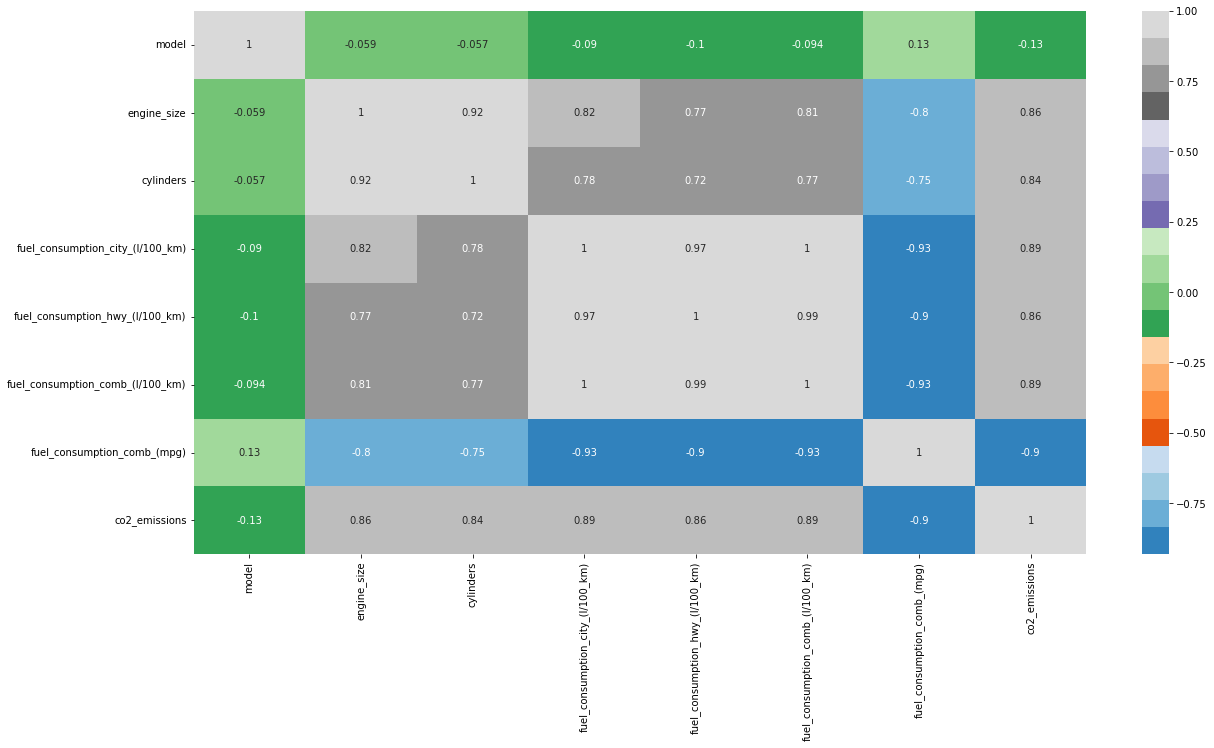

In [39]:
# using heat map visuals to check for the correlation among numerical columns
plt.figure(figsize = (20,10))


sns.heatmap(df_num.corr(method = 'pearson'), annot = True, cmap ='tab20c')

fuel_consumption_comb_(mpg) has a high negative correlation of -0.93

CO2 emmissions have good correlation across each columns ( >0.9)

### Visualization Analyses

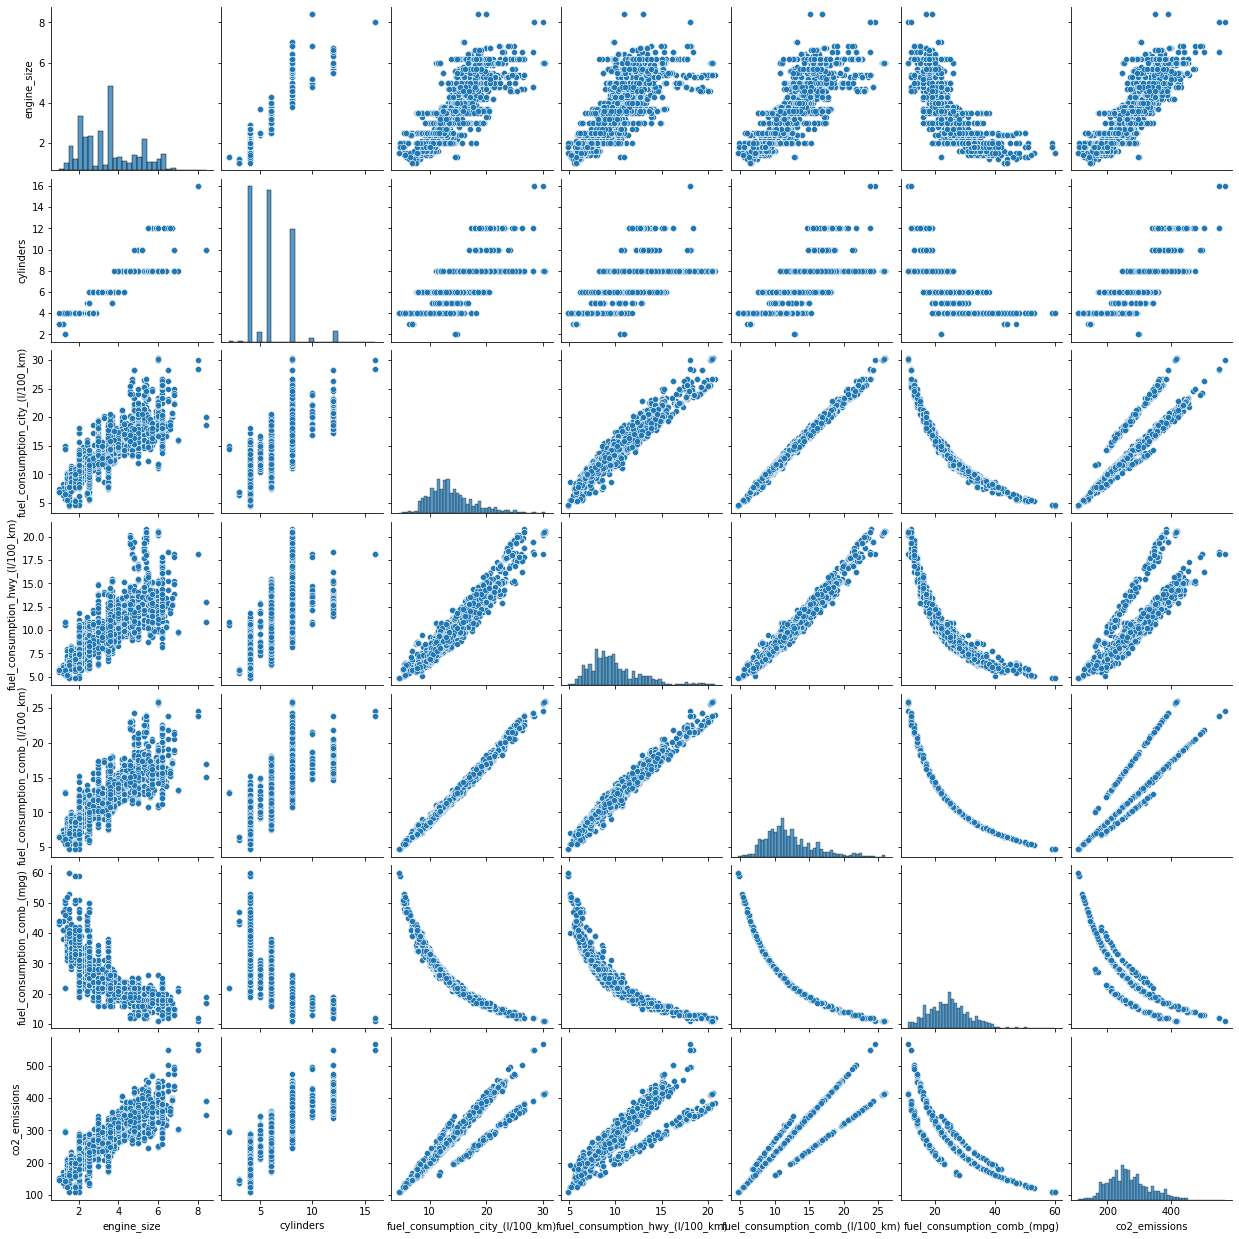

In [40]:
# univariate analysis with numerical columns
#df.drop(df[['index']], axis = 1, inplace = True)
plot = df_num.drop(df_num[['model']], axis = 1)
sns.pairplot(data = plot)


Bivariate plots

In [41]:
df.columns

Index(['model', 'make', 'model.1', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)',
       'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

Grouping the data and taking the top 10 of each of the groups for the analyses

In [42]:
ma_co2 = df.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(10)
mo_co2 = df.groupby('model.1')['co2_emissions'].mean().sort_values(ascending=False).head(10)
ve_co2 = df.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).head(10)
trans_co2 = df.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).head(10)
fuel_co2 = df.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).head()

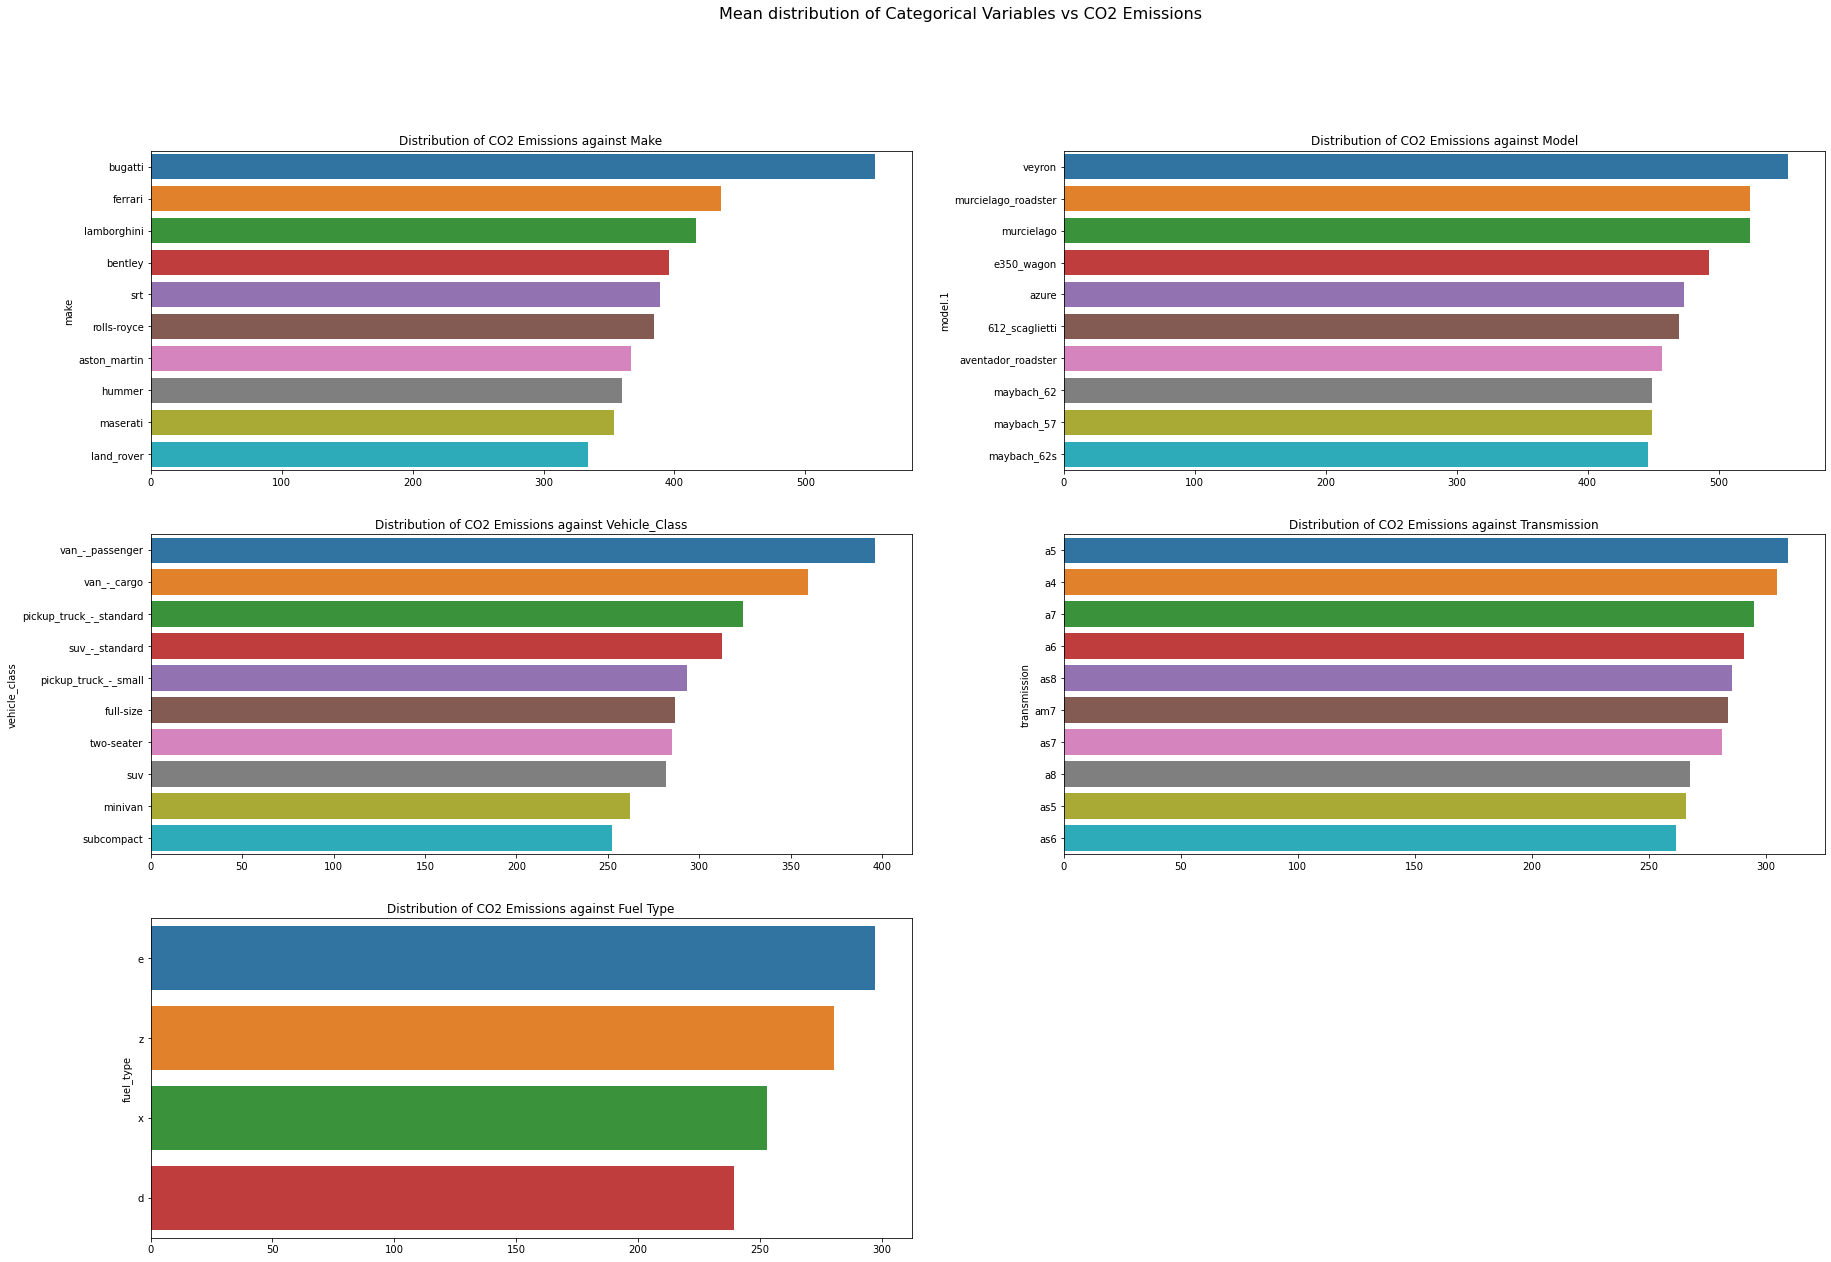

In [43]:
# plotting the above grouped data for more insights
fig, axes = plt.subplots(3,2, figsize=(30,20))
fig.suptitle('Mean distribution of Categorical Variables vs CO2 Emissions', size=16)

sns.barplot(ax=axes[0][0],x = ma_co2.values,y = ma_co2.index)
axes[0][0].set_title('Distribution of CO2 Emissions against Make')

sns.barplot(ax=axes[0][1],x = mo_co2.values,y = mo_co2.index)
axes[0][1].set_title('Distribution of CO2 Emissions against Model')

sns.barplot(ax=axes[1][0],x = ve_co2.values,y = ve_co2.index)
axes[1][0].set_title('Distribution of CO2 Emissions against Vehicle_Class')

sns.barplot(ax=axes[1][1],x = trans_co2.values,y = trans_co2.index)
axes[1][1].set_title('Distribution of CO2 Emissions against Transmission')


sns.barplot(ax=axes[2][0], x=fuel_co2.values,y=fuel_co2.index)
axes[2][0].set_title('Distribution of CO2 Emissions against Fuel Type')

fig.delaxes(axes[2][1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

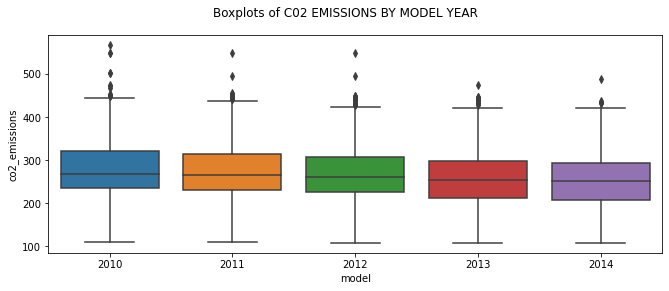

In [44]:

# df_ob['model'].boxplot(figsize = (15,10), fontsize = 15, rot = 30)
# # plt.show()

fig = plt.figure(figsize=(11, 4))

fig.suptitle('Boxplots of C02 EMISSIONS BY MODEL YEAR')
sns.boxplot(data=df, x="model", y="co2_emissions")
plt.show 

In [45]:
df['model'] = df['model'].astype(str)
df_num = df.select_dtypes(exclude ='object')
df_num

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  
0                              30            219  
1                              32            205  
2                              28            230  
3                              21            304  
4                              24            274  
...                           ...            ...  
5354                           24            271  
5355                           25            264  
5356                           24            271  
5357                           25            260  
5358                           22            294  

[5359 rows x 7 columns]

In [46]:
df_ob = df.select_dtypes(include = 'object')

## Splitting our data

In [47]:

X = df_num.drop(['co2_emissions'], axis = 1)
y = df_num['co2_emissions']


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)

In [50]:
X_train

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
346           5.4          8                              19.1   
1356          3.7          6                              16.1   
4720          3.6          6                              14.3   
5128          2.5          4                               8.7   
4977          2.0          4                               6.2   
...           ...        ...                               ...   
1928          3.8          6                              13.1   
2583          5.3          8                              21.5   
4476          3.6          6                              13.2   
5161          3.4          6                              12.0   
1258          5.3          8                              18.0   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
346                              13.6                              16.7   
1356                             11.5                              14.0   
4720                              9.9                              12.3   
5128                              6.2                               7.6   
4977                              6.4                               6.3   
...                               ...                               ...   
1928                              9.4                              11.4   
2583                             14.6                              18.4   
4476                              8.7                              11.2   
5161                              8.7                              10.5   
1258                             13.4                              15.9   

      fuel_consumption_comb_(mpg)  
346                            17  
1356                           20  
4720                           23  
5128                           37  
4977                           45  
...                           ...  
1928                           25  
2583                           15  
4476                           25  
5161                           27  
1258                           18  

[3014 rows x 6 columns]

## Scalling our data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# create an instance of the scaler
scaler = MinMaxScaler()

### Fitting and transform

- we don't want to fit the test data, we just want to fit the train data to prevent leakage

In [53]:
X_train_scaled = scaler.fit_transform(X_train)

In [54]:
X_test_scaled = scaler.transform(X_test)

In [55]:
X_val_scaled = scaler.transform(X_val)

In [56]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [57]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [58]:
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

## Simple Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression Model

In [60]:
model = LinearRegression() #instance of linear regression

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Linear Regression")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Linear Regression
The result of the mean_absolute_error is: 15.35
The result of the root mean squared error is: 22.63
The result of the coefficient of determination is: 0.88


Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
model = DecisionTreeRegressor(random_state=123)

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Decision Tree")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Decision Tree
The result of the mean_absolute_error is: 1.18
The result of the root mean squared error is: 8.09
The result of the coefficient of determination is: 0.98


Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor(random_state=123)

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','cylinders','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Random Forest")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Random Forest
The result of the mean_absolute_error is: 1.64
The result of the root mean squared error is: 7.34
The result of the coefficient of determination is: 0.99


<AxesSubplot:>

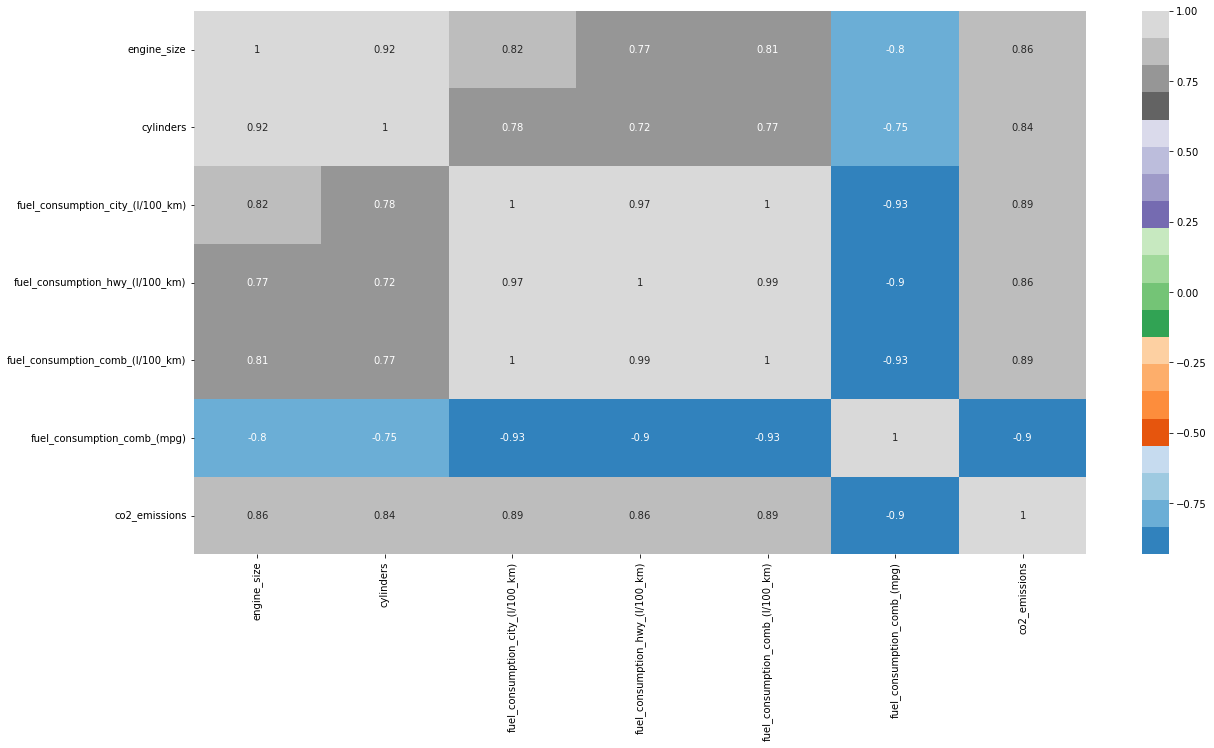

In [65]:
# using heat map visuals to check for the correlation among numerical columns
plt.figure(figsize = (20,10))


sns.heatmap(df_num.corr(method = 'pearson'), annot = True, cmap ='tab20c')

#### Taking a Subset to repeat the procedure. 
    - The subset selected will be columns with:
        -a. correlation >0.85
        -b. correlation >0.87
        

##### For correlation >0.85

In [66]:
# Splitting the data
X = df_num.drop(['co2_emissions','cylinders' ], axis = 1)
y = df_num['co2_emissions']


In [67]:
# using attributes of test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)

# create an instance of the scaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

Linear Regression Model

In [68]:
model = LinearRegression() #instance of linear regression

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Linear Regression")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Linear Regression
The result of the mean_absolute_error is: 15.69
The result of the root mean squared error is: 23.62
The result of the coefficient of determination is: 0.87


Decision Tree Model

In [69]:
model = DecisionTreeRegressor(random_state=123)

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Decision Tree")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Decision Tree
The result of the mean_absolute_error is: 1.19
The result of the root mean squared error is: 9.18
The result of the coefficient of determination is: 0.98


Random Forest Model

In [70]:
model = RandomForestRegressor(random_state=123)

def report_model_test(model):
    model.fit(X_train_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['engine_size','fuel_consumption_city_(l/100_km)','fuel_consumption_hwy_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Random Forest")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Random Forest
The result of the mean_absolute_error is: 1.73
The result of the root mean squared error is: 8.32
The result of the coefficient of determination is: 0.98


##### For correlation >0.87

In [71]:
# Splitting the data
X = df_num.drop(['co2_emissions','cylinders','engine_size', 'fuel_consumption_hwy_(l/100_km)'], axis = 1)
y = df_num['co2_emissions']

In [72]:
# using attributes of test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

#using 25% of the data and a random state 0f 101

X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)

# create an instance of the scaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

Linear Regression Model

In [73]:
model = LinearRegression() #instance of linear regression

def report_model_test(model):
    model.fit(X_train_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("Linear Regression")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    

report_model_test(model)

Linear Regression
The result of the mean_absolute_error is: 16.70
The result of the root mean squared error is: 26.31
The result of the coefficient of determination is: 0.84


Decision Tree Regressor Model()

In [74]:
model = DecisionTreeRegressor(random_state=123)

def report_model_test(model):
    model.fit(X_train_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("DecisionTreeRegressor")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    
report_model_test(model)
    

DecisionTreeRegressor
The result of the mean_absolute_error is: 4.35
The result of the root mean squared error is: 19.04
The result of the coefficient of determination is: 0.91


Random Forest Model

In [75]:
model = RandomForestRegressor(random_state=123)


def report_model_test(model):
    model.fit(X_train_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']],y_train)
    basem_preds = model.predict(X_test_scaled[['fuel_consumption_city_(l/100_km)','fuel_consumption_comb_(mpg)','fuel_consumption_comb_(l/100_km)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    print("RandomForestRegressor")
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is: {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
    
report_model_test(model)
    

RandomForestRegressor
The result of the mean_absolute_error is: 5.36
The result of the root mean squared error is: 18.04
The result of the coefficient of determination is: 0.92


## Object Training using Fuel type as target

In [76]:
df.head()

model   make        model.1 vehicle_class  engine_size  cylinders  \
0  2010  acura            csx       compact          2.0          4   
1  2010  acura            csx       compact          2.0          4   
2  2010  acura            csx       compact          2.0          4   
3  2010  acura        mdx_awd           suv          3.7          6   
4  2010  acura  rdx_awd_turbo           suv          2.3          4   

  transmission fuel_type  fuel_consumption_city_(l/100_km)  \
0          as5         x                              10.9   
1           m5         x                              10.0   
2           m6         z                              11.6   
3          as6         z                              14.8   
4          as5         z                              13.2   

   fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                              7.8                               9.5   
1                              7.6                               8.9   
2                              8.1                              10.0   
3                             11.3                              13.2   
4                             10.3                              11.9   

   fuel_consumption_comb_(mpg)  co2_emissions  
0                           30            219  
1                           32            205  
2                           28            230  
3                           21            304  
4                           24            274

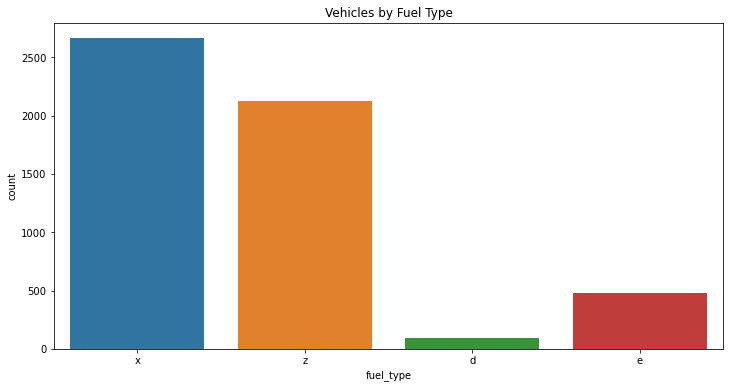

In [77]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(data = df, x = 'fuel_type')
plt.title('Vehicles by Fuel Type')
plt.show()

In [78]:
#!pip install imbalanced-learn

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [80]:

le = LabelEncoder()# declares an instance of the object
le_data = le.fit_transform(df_ob[['fuel_type']])# applies the object to data
df_le = pd.DataFrame(le_data, columns = ['fuel_type']) # creates a dataframe
new_df_le = pd.concat([df_num, df_le], axis = 1)
new_df_le


engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  fuel_type  
0                              30            219          2  
1                              32            205          2  
2                              28            230          3  
3                              21            304          3  
4                              24            274          3  
...                           ...            ...        ...  
5354                           24            271          2  
5355                           25            264          2  
5356                           24            271          2  
5357                           25            260          2  
5358                           22            294          2  

[5359 rows x 8 columns]

In [81]:
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model          5359 non-null   object
 1   make           5359 non-null   object
 2   model.1        5359 non-null   object
 3   vehicle_class  5359 non-null   object
 4   transmission   5359 non-null   object
 5   fuel_type      5359 non-null   object
dtypes: object(6)
memory usage: 251.3+ KB


In [82]:

ohe = OneHotEncoder() # declares an instance of the object 
ohe_data=ohe.fit_transform(df_ob[['model', 'make','vehicle_class','transmission']]).toarray() # applies the object to data 
feature_names = ohe.get_feature_names(['model', 'make','vehicle_class','transmission'])
df_ohe = pd.DataFrame(ohe_data, columns = feature_names ) # creating a dataframe for the ohe variable
df_ohe.drop(['model_2010', 'make_acura', 'vehicle_class_compact', 'transmission_a4'], axis = 1, inplace = True) # removing one axis to prevent multicolinearity
new_df_ohe = pd.concat([new_df_le, df_ohe], axis = 1) 
new_df_ohe


engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  fuel_type  model_2011  \
0                              30            219          2         0.0   
1                              32            205          2         0.0   
2                              28            230          3         0.0   
3                              21            304          3         0.0   
4                              24            274          3         0.0   
...                           ...            ...        ...         ...   
5354                           24            271          2         0.0   
5355                           25            264          2         0.0   
5356                           24            271          2         0.0   
5357                           25            260          2         0.0   
5358                           22            294          2         0.0   

      model_2012  ...  transmission_as7  transmission_as8  transmission_as9  \
0            0.0  ...               0.0               0.0               0.0   
1            0.0  ...               0.0               0.0               0.0   
2            0.0  ...               0.0               0.0               0.0   
3            0.0  ...               0.0               0.0               0.0   
4            0.0  ...               0.0               0.0               0.0   
...          ...  ...               ...               ...               ...   
5354         0.0  ...               0.0               0.0               0.0   
5355         0.0  ...               0.0               0.0               0.0   
5356         0.0  ...               0.0               0.0               0.0   
5357         0.0  ...               0.0               0.0               0.0   
5358         0.0  ...               0.0               0.0               0.0   

      transmission_av  transmission_av6  transmission_av7  transmission_av8  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0          

In [83]:
#df_ohe.columns


## Prediction For Fuel TYPE

In [84]:
X = new_df_ohe.drop('fuel_type', axis = 1) 
y = new_df_ohe['fuel_type']

## Importing SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [87]:
df_sm = pd.concat([X_res,y_res], axis = 1)

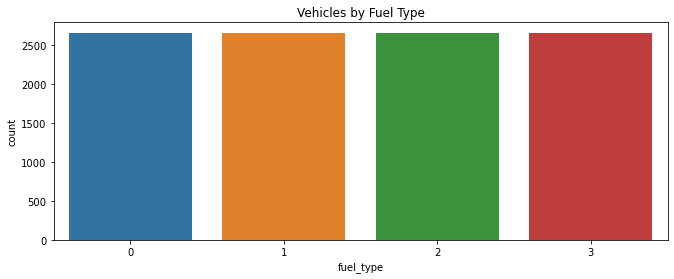

In [88]:
fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df_sm, x = 'fuel_type')
plt.title('Vehicles by Fuel Type')
plt.show()

In [89]:
df_sm.shape

(10652, 93)

In [90]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [91]:
from sklearn.metrics import (accuracy_score, classification_report,
 confusion_matrix, ConfusionMatrixDisplay,
 plot_roc_curve,roc_auc_score)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # SVC: support vector classifier 
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [93]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models


[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [94]:

def report_cross_val_score(models):
    for name,model in models:
        kfold = KFold(n_splits=5)
        cv_result = cross_val_score(model,X_train_scaled,y_train, cv = kfold,scoring = "accuracy")
        print(name, cv_result.std())
        print(name, cv_result)
 
 
report_cross_val_score(models)

LR 0.0014319878575536871
LR [0.95869837 0.95556946 0.95682103 0.95494368 0.95491547]
KNN 0.003063478642357066
KNN [0.88047559 0.88673342 0.8873592  0.88047559 0.8816531 ]
Dtree 0.003470691700689483
Dtree [0.97747184 0.98185232 0.98060075 0.98498123 0.98747652]
SVC 0.0022620727347319246
SVC [0.96245307 0.95619524 0.95932416 0.96182728 0.95867251]
RF 0.002393696491558323
RF [0.99249061 0.98560701 0.99061327 0.98873592 0.99123356]


LR
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       660
           1       1.00      0.99      1.00       665
           2       0.91      0.95      0.93       680
           3       0.96      0.87      0.91       658

    accuracy                           0.95      2663
   macro avg       0.95      0.95      0.95      2663
weighted avg       0.95      0.95      0.95      2663



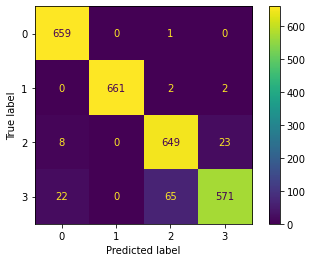

KNN
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       660
           1       0.87      0.99      0.93       665
           2       0.93      0.81      0.86       680
           3       0.93      0.87      0.90       658

    accuracy                           0.92      2663
   macro avg       0.92      0.92      0.92      2663
weighted avg       0.92      0.92      0.92      2663



<Figure size 8000x8000 with 0 Axes>

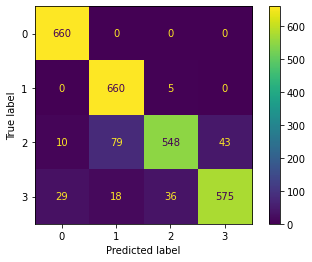

Dtree
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       660
           1       1.00      0.67      0.80       665
           2       0.81      0.95      0.87       680
           3       0.85      0.95      0.90       658

    accuracy                           0.89      2663
   macro avg       0.91      0.89      0.89      2663
weighted avg       0.91      0.89      0.89      2663



<Figure size 8000x8000 with 0 Axes>

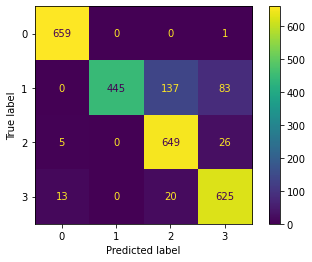

SVC
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       660
           1       1.00      1.00      1.00       665
           2       0.94      0.97      0.95       680
           3       0.97      0.91      0.94       658

    accuracy                           0.97      2663
   macro avg       0.97      0.97      0.97      2663
weighted avg       0.97      0.97      0.97      2663



<Figure size 8000x8000 with 0 Axes>

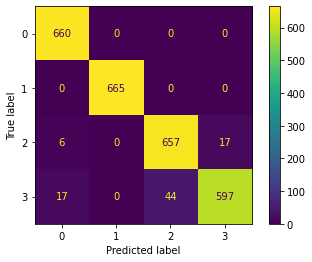

RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      0.99      0.99       665
           2       0.98      0.97      0.97       680
           3       0.96      0.99      0.97       658

    accuracy                           0.98      2663
   macro avg       0.99      0.99      0.99      2663
weighted avg       0.99      0.98      0.99      2663



<Figure size 8000x8000 with 0 Axes>

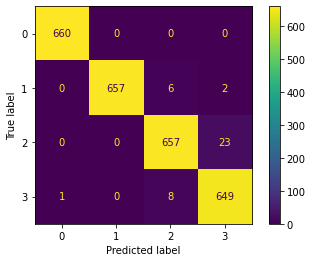

<Figure size 8000x8000 with 0 Axes>

In [95]:
 #The model test report
def report_model_test(models):
     for name,model in models:           
        model.fit(X_train_scaled,y_train)
        basem_preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.show()
        plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(models)


## Object Training using Model as target

In [96]:
df.head()

model   make        model.1 vehicle_class  engine_size  cylinders  \
0  2010  acura            csx       compact          2.0          4   
1  2010  acura            csx       compact          2.0          4   
2  2010  acura            csx       compact          2.0          4   
3  2010  acura        mdx_awd           suv          3.7          6   
4  2010  acura  rdx_awd_turbo           suv          2.3          4   

  transmission fuel_type  fuel_consumption_city_(l/100_km)  \
0          as5         x                              10.9   
1           m5         x                              10.0   
2           m6         z                              11.6   
3          as6         z                              14.8   
4          as5         z                              13.2   

   fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                              7.8                               9.5   
1                              7.6                               8.9   
2                              8.1                              10.0   
3                             11.3                              13.2   
4                             10.3                              11.9   

   fuel_consumption_comb_(mpg)  co2_emissions  
0                           30            219  
1                           32            205  
2                           28            230  
3                           21            304  
4                           24            274

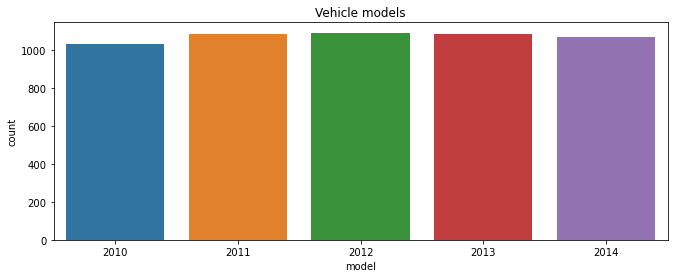

In [97]:
fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df, x = 'model')
plt.title('Vehicle models')
plt.show()

In [98]:
df.groupby(["model"]).size().reset_index(name='Total')

model  Total
0  2010   1030
1  2011   1085
2  2012   1091
3  2013   1082
4  2014   1071

In [99]:
#df.info()

In [100]:
# encoding the model
le = LabelEncoder()# declares an instance of the object
le_data = le.fit_transform(df_ob[['model']])# applies the object to data
df_le = pd.DataFrame(le_data, columns = ['model']) # creates a dataframe
new_df_le = pd.concat([df_num, df_le], axis = 1)
new_df_le

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  model  
0                              30            219      0  
1                              32            205      0  
2                              28            230      0  
3                              21            304      0  
4                              24            274      0  
...                           ...            ...    ...  
5354                           24            271      4  
5355                           25            264      4  
5356                           24            271      4  
5357                           25            260      4  
5358                           22            294      4  

[5359 rows x 8 columns]

In [101]:
# encoding the other objects data frame

ohe = OneHotEncoder() # declares an instance of the object 
ohe_data=ohe.fit_transform(df_ob[['fuel_type', 'make','vehicle_class','transmission']]).toarray() # applies the object to data 
feature_names = ohe.get_feature_names(['fuel_type', 'make','vehicle_class','transmission'])
df_ohe = pd.DataFrame(ohe_data, columns = feature_names ) # creating a dataframe for the ohe variable
#df_ohe.drop(['model_2010', 'make_acura', 'vehicle_class_compact', 'transmission_a4'], axis = 1, inplace = True) # removing one axis to prevent multicolinearity
new_df_ohe = pd.concat([new_df_le, df_ohe], axis = 1) 
new_df_ohe


engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  model  fuel_type_d  \
0                              30            219      0          0.0   
1                              32            205      0          0.0   
2                              28            230      0          0.0   
3                              21            304      0          0.0   
4                              24            274      0          0.0   
...                           ...            ...    ...          ...   
5354                           24            271      4          0.0   
5355                           25            264      4          0.0   
5356                           24            271      4          0.0   
5357                           25            260      4          0.0   
5358                           22            294      4          0.0   

      fuel_type_e  ...  transmission_as7  transmission_as8  transmission_as9  \
0             0.0  ...               0.0               0.0               0.0   
1             0.0  ...               0.0               0.0               0.0   
2             0.0  ...               0.0               0.0               0.0   
3             0.0  ...               0.0               0.0               0.0   
4             0.0  ...               0.0               0.0               0.0   
...           ...  ...               ...               ...               ...   
5354          0.0  ...               0.0               0.0               0.0   
5355          0.0  ...               0.0               0.0               0.0   
5356          0.0  ...               0.0               0.0               0.0   
5357          0.0  ...               0.0               0.0               0.0   
5358          0.0  ...               0.0               0.0               0.0   

      transmission_av  transmission_av6  transmission_av7  transmission_av8  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
...         

#### Prediction For Model Year

In [102]:
X = new_df_ohe.drop('model', axis = 1) 
y = new_df_ohe['model']

#### For Uniformity

In [103]:
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [104]:
df_sm = pd.concat([X_res,y_res], axis = 1)

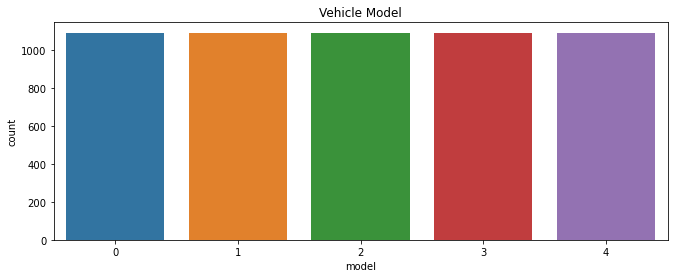

In [105]:
fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df_sm, x = 'model')
plt.title('Vehicle Model')
plt.show()

In [106]:
df_sm.shape

(5455, 96)

Scaling the data

In [107]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [108]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models


[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [109]:

def report_cross_val_score(models):
    for name,model in models:
        kfold = KFold(n_splits=5)
        cv_result = cross_val_score(model,X_train_scaled,y_train, cv = kfold,scoring = "accuracy")
        print(name, cv_result.std())
        print(name, cv_result)
 
 
report_cross_val_score(models)

LR 0.012532021064764183
LR [0.3003663  0.28484108 0.31418093 0.32151589 0.30440098]
KNN 0.016047422052502182
KNN [0.24175824 0.21638142 0.24327628 0.26650367 0.23594132]
Dtree 0.011563417347432043
Dtree [0.28327228 0.2591687  0.27750611 0.29217604 0.26772616]
SVC 0.021400861243498805
SVC [0.2979243  0.26772616 0.28484108 0.33251834 0.28973105]
RF 0.013312380798238054
RF [0.26984127 0.28239609 0.26894866 0.29584352 0.25672372]


LR
              precision    recall  f1-score   support

           0       0.39      0.49      0.43       273
           1       0.26      0.12      0.17       267
           2       0.27      0.20      0.23       278
           3       0.29      0.33      0.31       276
           4       0.35      0.49      0.41       270

    accuracy                           0.33      1364
   macro avg       0.31      0.33      0.31      1364
weighted avg       0.31      0.33      0.31      1364



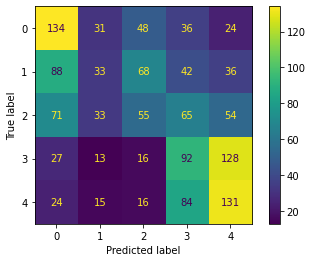

KNN
              precision    recall  f1-score   support

           0       0.27      0.42      0.33       273
           1       0.11      0.11      0.11       267
           2       0.13      0.10      0.12       278
           3       0.24      0.20      0.22       276
           4       0.36      0.29      0.32       270

    accuracy                           0.23      1364
   macro avg       0.22      0.23      0.22      1364
weighted avg       0.22      0.23      0.22      1364



<Figure size 8000x8000 with 0 Axes>

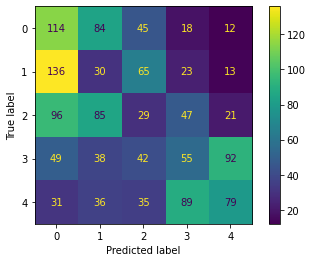

Dtree
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       273
           1       0.19      0.19      0.19       267
           2       0.24      0.17      0.20       278
           3       0.30      0.28      0.29       276
           4       0.34      0.34      0.34       270

    accuracy                           0.29      1364
   macro avg       0.28      0.29      0.28      1364
weighted avg       0.28      0.29      0.28      1364



<Figure size 8000x8000 with 0 Axes>

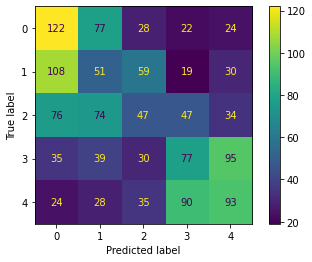

SVC
              precision    recall  f1-score   support

           0       0.36      0.46      0.40       273
           1       0.16      0.13      0.14       267
           2       0.23      0.13      0.17       278
           3       0.26      0.29      0.28       276
           4       0.36      0.42      0.39       270

    accuracy                           0.29      1364
   macro avg       0.27      0.29      0.27      1364
weighted avg       0.27      0.29      0.27      1364



<Figure size 8000x8000 with 0 Axes>

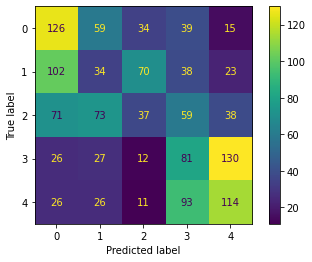

RF
              precision    recall  f1-score   support

           0       0.39      0.40      0.40       273
           1       0.10      0.10      0.10       267
           2       0.18      0.15      0.17       278
           3       0.22      0.22      0.22       276
           4       0.37      0.41      0.39       270

    accuracy                           0.26      1364
   macro avg       0.25      0.26      0.25      1364
weighted avg       0.25      0.26      0.25      1364



<Figure size 8000x8000 with 0 Axes>

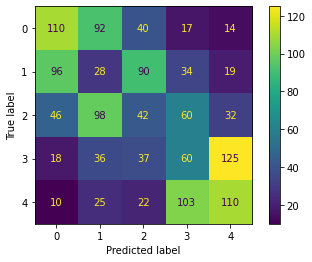

<Figure size 8000x8000 with 0 Axes>

In [110]:
 #The model test report
def report_model_test(models):
     for name,model in models:           
        model.fit(X_train_scaled,y_train)
        basem_preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.show()
        plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(models)


## Training using Cylinder as target

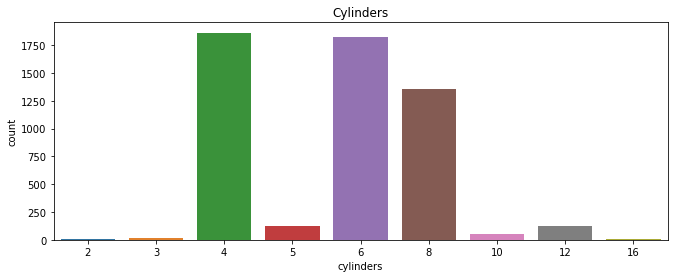

In [111]:

fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df, x = 'cylinders')
plt.title('Cylinders')
plt.show()

In [112]:
# no need for one label encoding for cylinder

In [113]:
# encoding the other objects data frame

ohe = OneHotEncoder() # declares an instance of the object 
ohe_data=ohe.fit_transform(df_ob[['model','fuel_type', 'make','vehicle_class','transmission']]).toarray() # applies the object to data 
feature_names = ohe.get_feature_names(['model','fuel_type', 'make','vehicle_class','transmission'])
df_ohe = pd.DataFrame(ohe_data, columns = feature_names ) # creating a dataframe for the ohe variable
#df_ohe.drop(['model_2010', 'make_acura', 'vehicle_class_compact', 'transmission_a4'], axis = 1, inplace = True) # removing one axis to prevent multicolinearity
new_df_ohe = pd.concat([new_df_le, df_ohe], axis = 1) 
new_df_ohe

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  model  model_2010  \
0                              30            219      0         1.0   
1                              32            205      0         1.0   
2                              28            230      0         1.0   
3                              21            304      0         1.0   
4                              24            274      0         1.0   
...                           ...            ...    ...         ...   
5354                           24            271      4         0.0   
5355                           25            264      4         0.0   
5356                           24            271      4         0.0   
5357                           25            260      4         0.0   
5358                           22            294      4         0.0   

      model_2011  ...  transmission_as7  transmission_as8  transmission_as9  \
0            0.0  ...               0.0               0.0               0.0   
1            0.0  ...               0.0               0.0               0.0   
2            0.0  ...               0.0               0.0               0.0   
3            0.0  ...               0.0               0.0               0.0   
4            0.0  ...               0.0               0.0               0.0   
...          ...  ...               ...               ...               ...   
5354         0.0  ...               0.0               0.0               0.0   
5355         0.0  ...               0.0               0.0               0.0   
5356         0.0  ...               0.0               0.0               0.0   
5357         0.0  ...               0.0               0.0               0.0   
5358         0.0  ...               0.0               0.0               0.0   

      transmission_av  transmission_av6  transmission_av7  transmission_av8  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
...               ...               

#### Prediction For Cylinder

In [114]:

X = new_df_ohe.drop('cylinders', axis = 1) 
y = new_df_ohe['cylinders']

#### For Uniformity

In [115]:
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

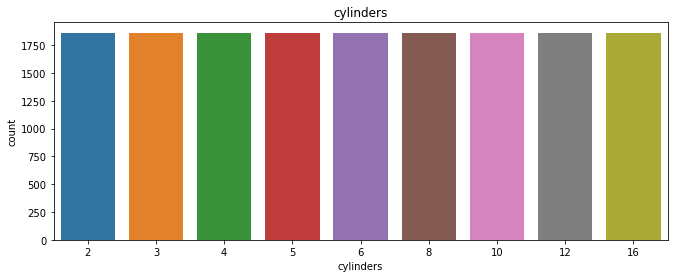

In [116]:
df_sm = pd.concat([X_res,y_res], axis = 1)

fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df_sm, x = 'cylinders')
plt.title('cylinders')
plt.show()

In [117]:
df_sm.shape  #check the shape

(16767, 101)

In [118]:
# scaling the data

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [119]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [120]:

def report_cross_val_score(models):
    for name,model in models:
        kfold = KFold(n_splits=5)
        cv_result = cross_val_score(model,X_train_scaled,y_train, cv = kfold,scoring = "accuracy")
        print(name, cv_result.std())
        print(name, cv_result)
 
 
report_cross_val_score(models)

LR 0.0013910819629849626
LR [0.97534791 0.97654076 0.97614314 0.97892644 0.97852883]
KNN 0.00296055832508728
KNN [0.9387674  0.93677932 0.93757455 0.9387674  0.93081511]
Dtree 0.00025147337257798447
Dtree [0.99840954 0.99920477 0.99880716 0.99880716 0.99880716]
SVC 0.0012164658879346626
SVC [0.98369781 0.98568588 0.98369781 0.98489066 0.98210736]
RF 0.0003895808736036723
RF [0.99960239 0.99920477 0.99920477 0.99840954 0.99920477]


LR
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       477
           4       0.97      0.96      0.96       461
           5       0.95      1.00      0.98       463
           6       0.98      0.93      0.95       488
           8       0.96      0.92      0.94       462
          10       0.96      1.00      0.98       452
          12       0.97      0.99      0.98       464
          16       1.00      1.00      1.00       461

    accuracy                           0.98      4192
   macro avg       0.98      0.98      0.98      4192
weighted avg       0.98      0.98      0.98      4192



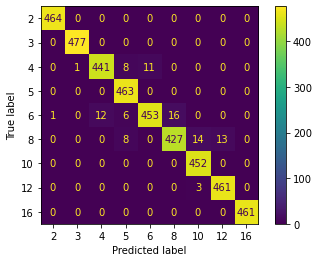

KNN
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       464
           3       0.99      1.00      1.00       477
           4       0.88      0.85      0.87       461
           5       0.91      1.00      0.95       463
           6       0.86      0.76      0.80       488
           8       0.87      0.86      0.87       462
          10       0.97      1.00      0.99       452
          12       0.96      1.00      0.98       464
          16       1.00      1.00      1.00       461

    accuracy                           0.94      4192
   macro avg       0.94      0.94      0.94      4192
weighted avg       0.94      0.94      0.94      4192



<Figure size 8000x8000 with 0 Axes>

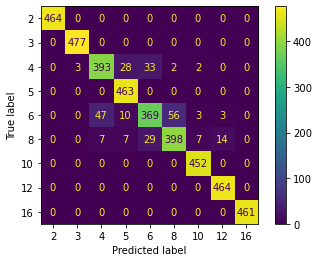

Dtree
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       477
           4       0.99      1.00      1.00       461
           5       1.00      1.00      1.00       463
           6       1.00      0.99      0.99       488
           8       0.99      1.00      1.00       462
          10       1.00      1.00      1.00       452
          12       1.00      1.00      1.00       464
          16       1.00      1.00      1.00       461

    accuracy                           1.00      4192
   macro avg       1.00      1.00      1.00      4192
weighted avg       1.00      1.00      1.00      4192



<Figure size 8000x8000 with 0 Axes>

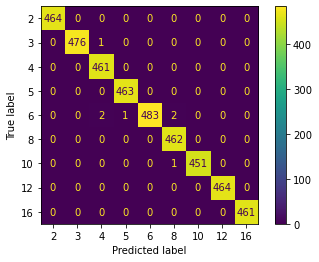

SVC
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       477
           4       0.96      0.96      0.96       461
           5       0.95      1.00      0.97       463
           6       0.97      0.94      0.96       488
           8       0.98      0.95      0.96       462
          10       0.99      1.00      1.00       452
          12       0.99      1.00      1.00       464
          16       1.00      1.00      1.00       461

    accuracy                           0.98      4192
   macro avg       0.98      0.98      0.98      4192
weighted avg       0.98      0.98      0.98      4192



<Figure size 8000x8000 with 0 Axes>

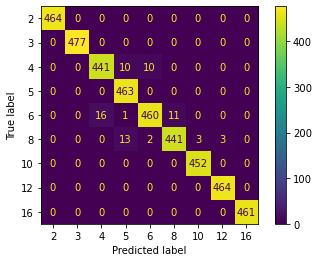

RF
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00       461
           5       1.00      1.00      1.00       463
           6       1.00      1.00      1.00       488
           8       1.00      1.00      1.00       462
          10       1.00      1.00      1.00       452
          12       1.00      1.00      1.00       464
          16       1.00      1.00      1.00       461

    accuracy                           1.00      4192
   macro avg       1.00      1.00      1.00      4192
weighted avg       1.00      1.00      1.00      4192



<Figure size 8000x8000 with 0 Axes>

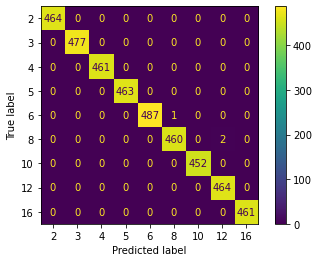

<Figure size 8000x8000 with 0 Axes>

In [121]:
#The model test report
def report_model_test(models):
     for name,model in models:           
        model.fit(X_train_scaled,y_train)
        basem_preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.show()
        plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(models)


## Training using Transmission as target

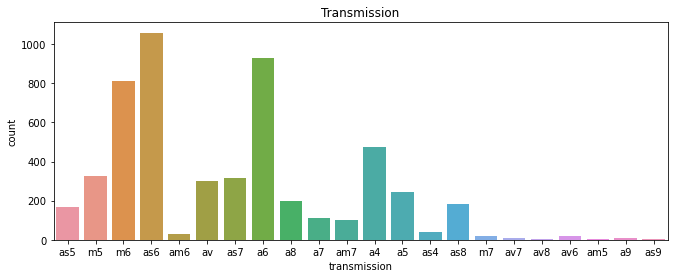

In [122]:
fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df, x = 'transmission')
plt.title('Transmission')
plt.show()

In [123]:
# encoding the model
le = LabelEncoder()# declares an instance of the object
le_data = le.fit_transform(df_ob[['transmission']])# applies the object to data
df_le = pd.DataFrame(le_data, columns = ['transmission']) # creates a dataframe
new_df_le = pd.concat([df_num, df_le], axis = 1)
new_df_le

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  transmission  
0                              30            219            10  
1                              32            205            19  
2                              28            230            20  
3                              21            304            11  
4                              24            274            10  
...                           ...            ...           ...  
5354                           24            271            11  
5355                           25            264            11  
5356                           24            271            11  
5357                           25            260            11  
5358                           22            294            11  

[5359 rows x 8 columns]

In [124]:
# encoding the other objects data frame

ohe = OneHotEncoder() # declares an instance of the object 
ohe_data=ohe.fit_transform(df_ob[['model','fuel_type', 'make','vehicle_class']]).toarray() # applies the object to data 
feature_names = ohe.get_feature_names(['model','fuel_type', 'make','vehicle_class'])
df_ohe = pd.DataFrame(ohe_data, columns = feature_names ) # creating a dataframe for the ohe variable
#df_ohe.drop(['model_2010', 'make_acura', 'vehicle_class_compact', 'transmission_a4'], axis = 1, inplace = True) # removing one axis to prevent multicolinearity
new_df_ohe = pd.concat([new_df_le, df_ohe], axis = 1) 
new_df_ohe

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  transmission  model_2010  \
0                              30            219            10         1.0   
1                              32            205            19         1.0   
2                              28            230            20         1.0   
3                              21            304            11         1.0   
4                              24            274            10         1.0   
...                           ...            ...           ...         ...   
5354                           24            271            11         0.0   
5355                           25            264            11         0.0   
5356                           24            271            11         0.0   
5357                           25            260            11         0.0   
5358                           22            294            11         0.0   

      model_2011  ...  vehicle_class_special_purpose_vehicle  \
0            0.0  ...                                    0.0   
1            0.0  ...                                    0.0   
2            0.0  ...                                    0.0   
3            0.0  ...                                    0.0   
4            0.0  ...                                    0.0   
...          ...  ...                                    ...   
5354         0.0  ...                                    0.0   
5355         0.0  ...                                    0.0   
5356         0.0  ...                                    0.0   
5357         0.0  ...                                    0.0   
5358         0.0  ...                                    0.0   

      vehicle_class_station_wagon_-_mid-size  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
5354                                     0.0   
5355                                     0.0   
5356                                     0.0   
5357                                     0.0   
5358                                     0.0   

      vehicle_class_station_w

#### Prediction For Transmission

In [138]:

X = new_df_ohe.drop('transmission', axis = 1) 
y = new_df_ohe['transmission']

#### For Uniformity

In [151]:
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 

In [152]:
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

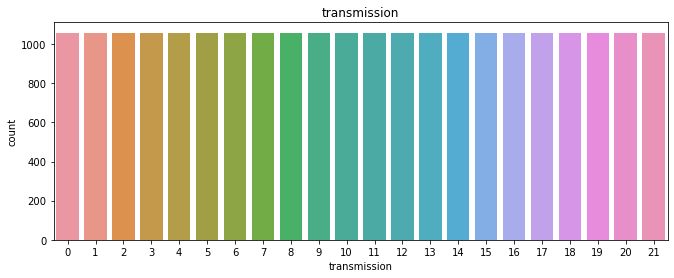

In [153]:
df_sm = pd.concat([X_res,y_res], axis = 1)

fig = plt.figure(figsize=(11, 4))
sns.countplot(data = df_sm, x = 'transmission')
plt.title('transmission')
plt.show()

In [154]:
df_sm.shape  # check the shape

(23276, 79)

In [155]:
# scaling the data

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [156]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [157]:

def report_cross_val_score(models):
    for name,model in models:
        kfold = KFold(n_splits=5)
        cv_result = cross_val_score(model,X_train_scaled,y_train, cv = kfold,scoring = "accuracy")
        print(name, cv_result.std())
        print(name, cv_result)
 
 
report_cross_val_score(models)

LR 0.006078573878630109
LR [0.79639175 0.78608247 0.80034374 0.79547408 0.78487539]
KNN 0.0032640248751618466
KNN [0.85395189 0.85080183 0.85734746 0.85534231 0.84818104]
Dtree 0.0062075677915466795
Dtree [0.94415808 0.93757159 0.95244915 0.94586078 0.93497565]
SVC 0.009383650741293591
SVC [0.84994273 0.82617411 0.84674878 0.84904039 0.8344314 ]
RF 0.004696304484660357
RF [0.96305842 0.95733104 0.96247494 0.96018333 0.95015755]


LR
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       275
           1       0.79      0.77      0.78       285
           2       0.68      0.49      0.57       283
           3       0.76      0.88      0.82       273
           4       0.81      0.92      0.86       252
           5       0.95      1.00      0.97       259
           6       1.00      1.00      1.00       258
           7       0.72      0.97      0.83       251
           8       0.72      0.64      0.68       273
           9       0.74      1.00      0.85       271
          10       0.71      0.76      0.73       255
          11       0.51      0.45      0.48       253
          12       0.88      0.70      0.78       269
          13       0.79      0.88      0.83       267
          14       0.98      1.00      0.99       249
          15       0.89      0.74      0.81       266
          16       0.97      1.00      0.98       248
          17       0.94 

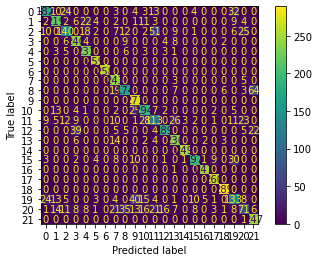

KNN
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       275
           1       0.78      0.89      0.83       285
           2       0.73      0.57      0.64       283
           3       0.94      0.97      0.95       273
           4       0.86      0.98      0.92       252
           5       0.99      1.00      1.00       259
           6       1.00      1.00      1.00       258
           7       0.90      0.98      0.94       251
           8       0.90      0.93      0.92       273
           9       0.91      1.00      0.95       271
          10       0.76      0.92      0.83       255
          11       0.61      0.43      0.50       253
          12       0.91      0.90      0.91       269
          13       0.90      0.94      0.92       267
          14       1.00      1.00      1.00       249
          15       0.85      0.88      0.87       266
          16       0.98      1.00      0.99       248
          17       0.96

<Figure size 8000x8000 with 0 Axes>

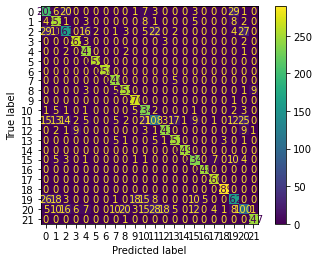

Dtree
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       275
           1       0.71      0.85      0.77       285
           2       0.64      0.75      0.69       283
           3       0.97      0.96      0.96       273
           4       0.91      0.90      0.91       252
           5       1.00      0.74      0.85       259
           6       1.00      1.00      1.00       258
           7       0.97      0.84      0.90       251
           8       0.96      0.92      0.94       273
           9       0.98      0.90      0.93       271
          10       0.89      0.89      0.89       255
          11       0.65      0.73      0.69       253
          12       0.95      0.94      0.94       269
          13       0.95      0.95      0.95       267
          14       0.99      1.00      0.99       249
          15       0.95      0.92      0.94       266
          16       0.99      1.00      1.00       248
          17       0.

<Figure size 8000x8000 with 0 Axes>

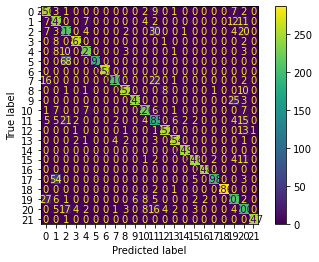

SVC
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       275
           1       0.80      0.85      0.82       285
           2       0.79      0.57      0.66       283
           3       0.90      0.94      0.92       273
           4       0.86      0.98      0.92       252
           5       0.96      1.00      0.98       259
           6       1.00      1.00      1.00       258
           7       0.87      1.00      0.93       251
           8       0.82      0.72      0.77       273
           9       0.85      1.00      0.92       271
          10       0.79      0.86      0.82       255
          11       0.67      0.61      0.64       253
          12       0.87      0.81      0.84       269
          13       0.91      0.90      0.90       267
          14       1.00      1.00      1.00       249
          15       0.90      0.80      0.85       266
          16       0.96      1.00      0.98       248
          17       0.94

<Figure size 8000x8000 with 0 Axes>

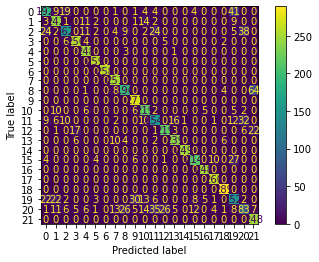

RF
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       275
           1       0.95      0.97      0.96       285
           2       0.88      0.80      0.83       283
           3       0.99      1.00      0.99       273
           4       0.99      0.98      0.98       252
           5       1.00      1.00      1.00       259
           6       1.00      1.00      1.00       258
           7       0.99      1.00      0.99       251
           8       0.98      0.99      0.99       273
           9       0.99      0.98      0.99       271
          10       0.95      0.96      0.95       255
          11       0.77      0.79      0.78       253
          12       0.98      0.96      0.97       269
          13       0.98      0.99      0.98       267
          14       0.99      1.00      0.99       249
          15       0.99      0.99      0.99       266
          16       1.00      1.00      1.00       248
          17       1.00 

<Figure size 8000x8000 with 0 Axes>

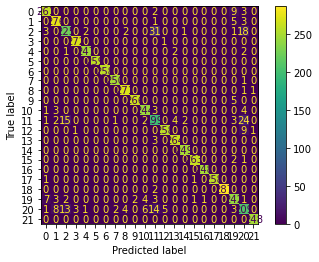

<Figure size 8000x8000 with 0 Axes>

In [158]:
#The model test report
def report_model_test(models):
     for name,model in models:           
        model.fit(X_train_scaled,y_train)
        basem_preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.show()
        plt.figure(figsize=(40,40), dpi = 200);
 
 
report_model_test(models)


### Clustering

In [159]:
df_num

engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  
0                              30            219  
1                              32            205  
2                              28            230  
3                              21            304  
4                              24            274  
...                           ...            ...  
5354                           24            271  
5355                           25            264  
5356                           24            271  
5357                           25            260  
5358                           22            294  

[5359 rows x 7 columns]

In [160]:
scaler = MinMaxScaler()

In [162]:
df_num_scaled = scaler.fit_transform(df_num)

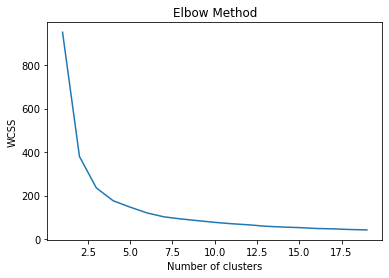

In [167]:
# using the elbow method to determine the number of n
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=74)
    kmeans.fit(df_num_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [168]:
# assigning the model
model = KMeans(n_clusters = 15)  # using 15 clusters
cluster_labels = model.fit_predict(df_num_scaled) # fiting and predicting the clusters
cluster_labels

array([13, 13,  2, ...,  0,  7,  0])

In [171]:
df_num['clusters'] = cluster_labels
df_num.head()



engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0          2.0          4                              10.9   
1          2.0          4                              10.0   
2          2.0          4                              11.6   
3          3.7          6                              14.8   
4          2.3          4                              13.2   

   fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                              7.8                               9.5   
1                              7.6                               8.9   
2                              8.1                              10.0   
3                             11.3                              13.2   
4                             10.3                              11.9   

   fuel_consumption_comb_(mpg)  co2_emissions  clusters  
0                           30            219        13  
1                           32            205        13  
2                           28            230         2  
3                           21            304        11  
4                           24            274        12

In [172]:
# concatenate with the object data report
clustered_s = pd.concat([df_ob, df_num], axis = 1) 
clustered_s

model   make        model.1   vehicle_class transmission fuel_type  \
0     2010  acura            csx         compact          as5         x   
1     2010  acura            csx         compact           m5         x   
2     2010  acura            csx         compact           m6         z   
3     2010  acura        mdx_awd             suv          as6         z   
4     2010  acura  rdx_awd_turbo             suv          as5         z   
...    ...    ...            ...             ...          ...       ...   
5354  2014  volvo       xc60_awd     suv_-_small          as6         x   
5355  2014  volvo       xc60_awd     suv_-_small          as6         x   
5356  2014  volvo       xc70_awd     suv_-_small          as6         x   
5357  2014  volvo       xc70_awd     suv_-_small          as6         x   
5358  2014  volvo       xc90_awd  suv_-_standard          as6         x   

      engine_size  cylinders  fuel_consumption_city_(l/100_km)  \
0             2.0          4                              10.9   
1             2.0          4                              10.0   
2             2.0          4                              11.6   
3             3.7          6                              14.8   
4             2.3          4                              13.2   
...           ...        ...                               ...   
5354          3.0          6                              13.4   
5355          3.2          6                              13.2   
5356          3.0          6                              13.4   
5357          3.2          6                              12.9   
5358          3.2          6                              14.9   

      fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
0                                 7.8                               9.5   
1                                 7.6                               8.9   
2                                 8.1                              10.0   
3                                11.3                              13.2   
4                                10.3                              11.9   
...                               ...                               ...   
5354                              9.8                              11.8   
5355                              9.5                              11.5   
5356                              9.8                              11.8   
5357                              9.3                              11.3   
5358                             10.2                              12.8   

      fuel_consumption_comb_(mpg)  co2_emissions  clusters  
0                              30            219        13  
1                              32            205        13  
2                              28            230         2  
3                              21            304        11  
4                              24            274        12  
...                           ...            ...       ...  
5354                           24            271         0  
5355                           25            264         7  
5356                           24            271         0  
5357                           25            260         7  
5358                           22            294         0  

[5359 rows x 14 columns]

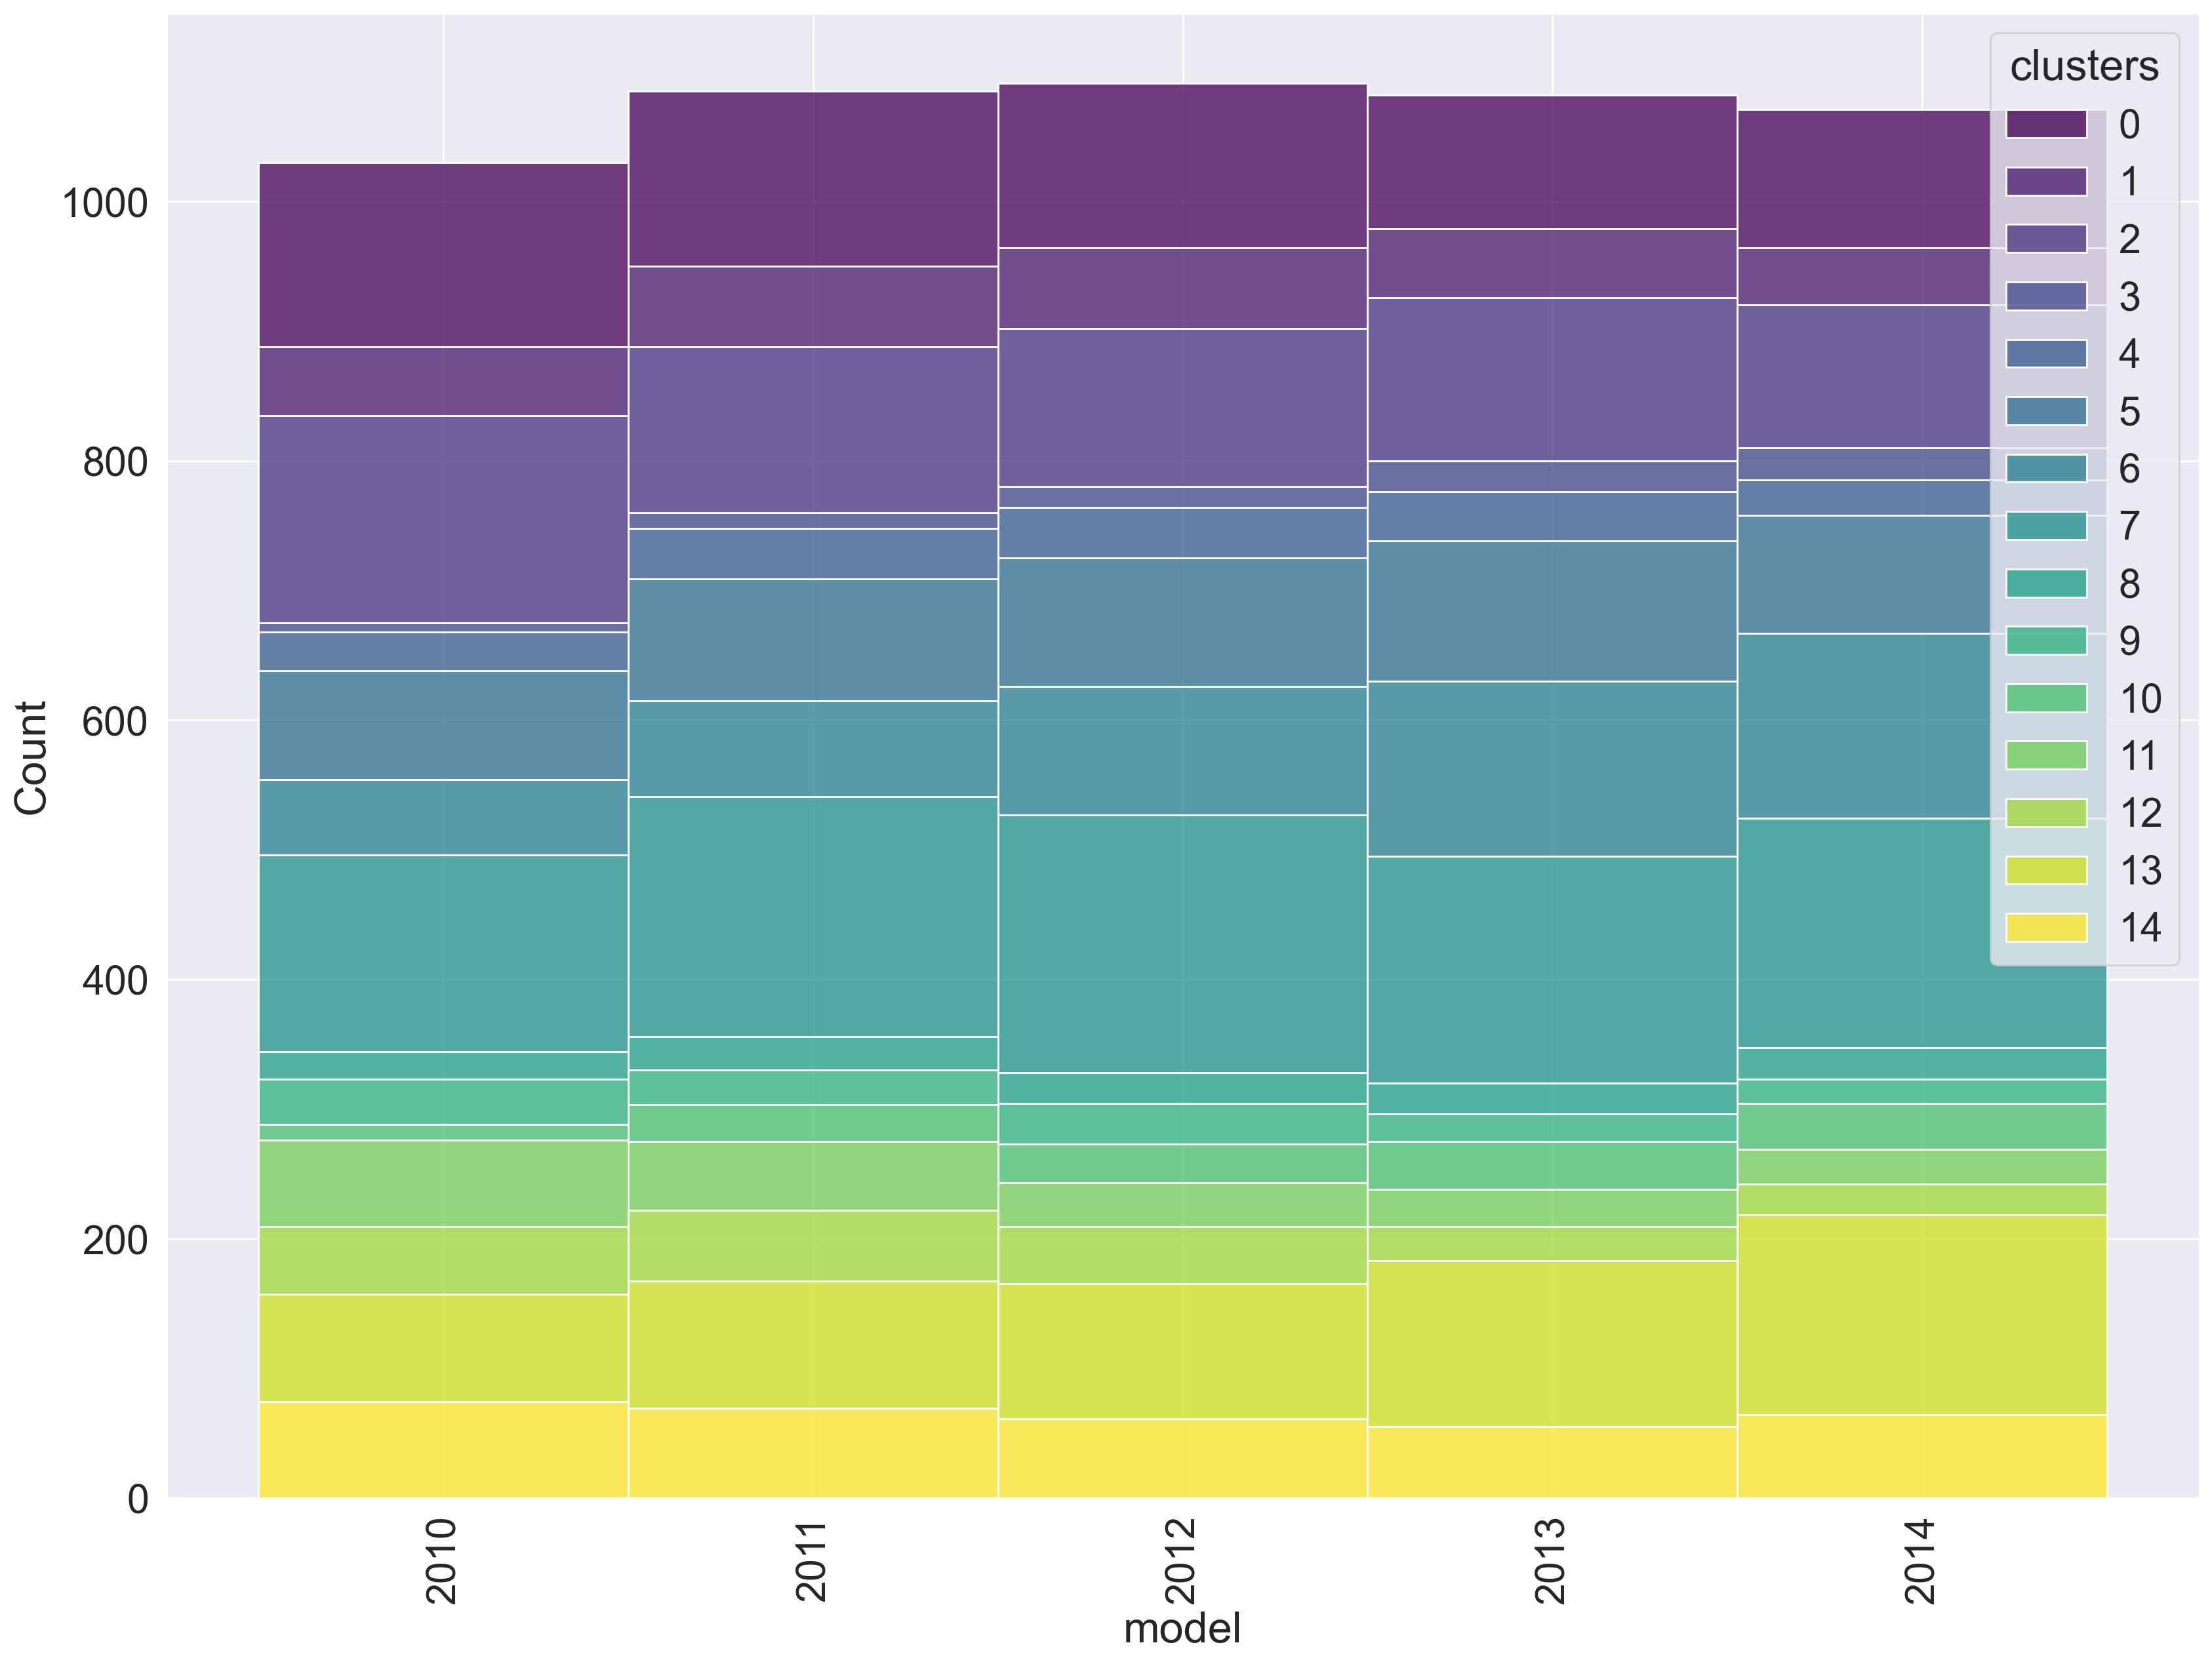

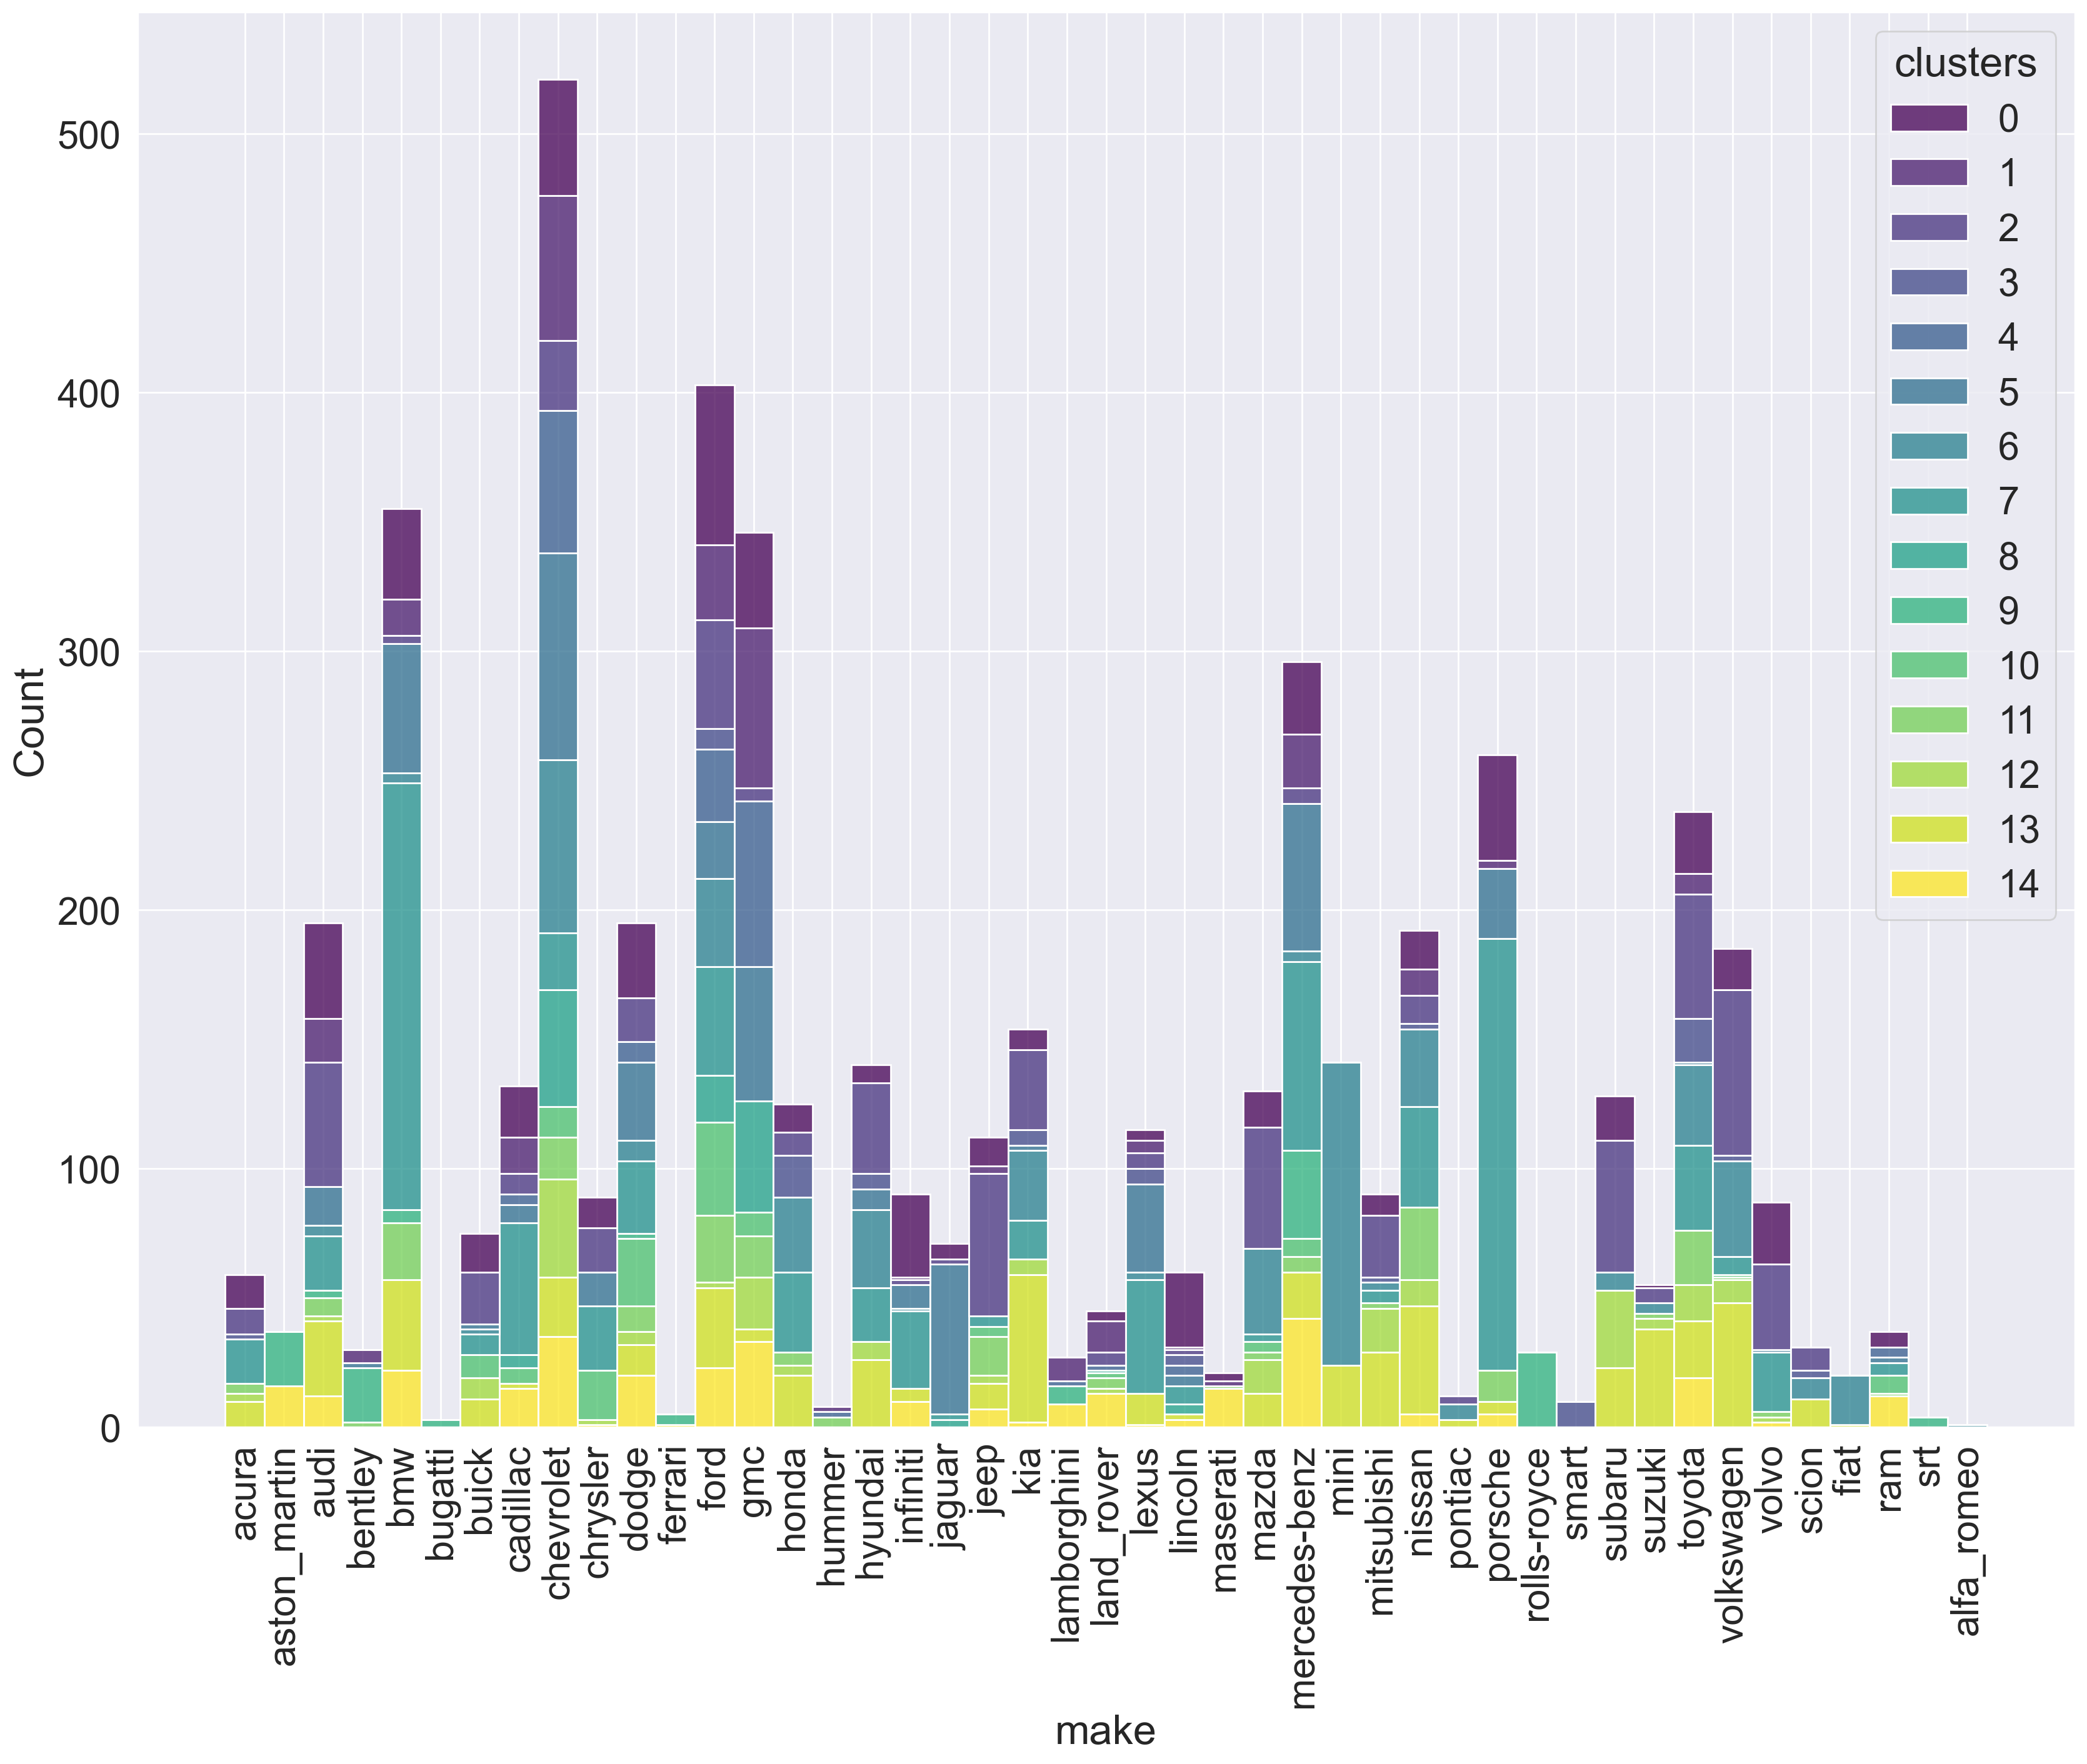

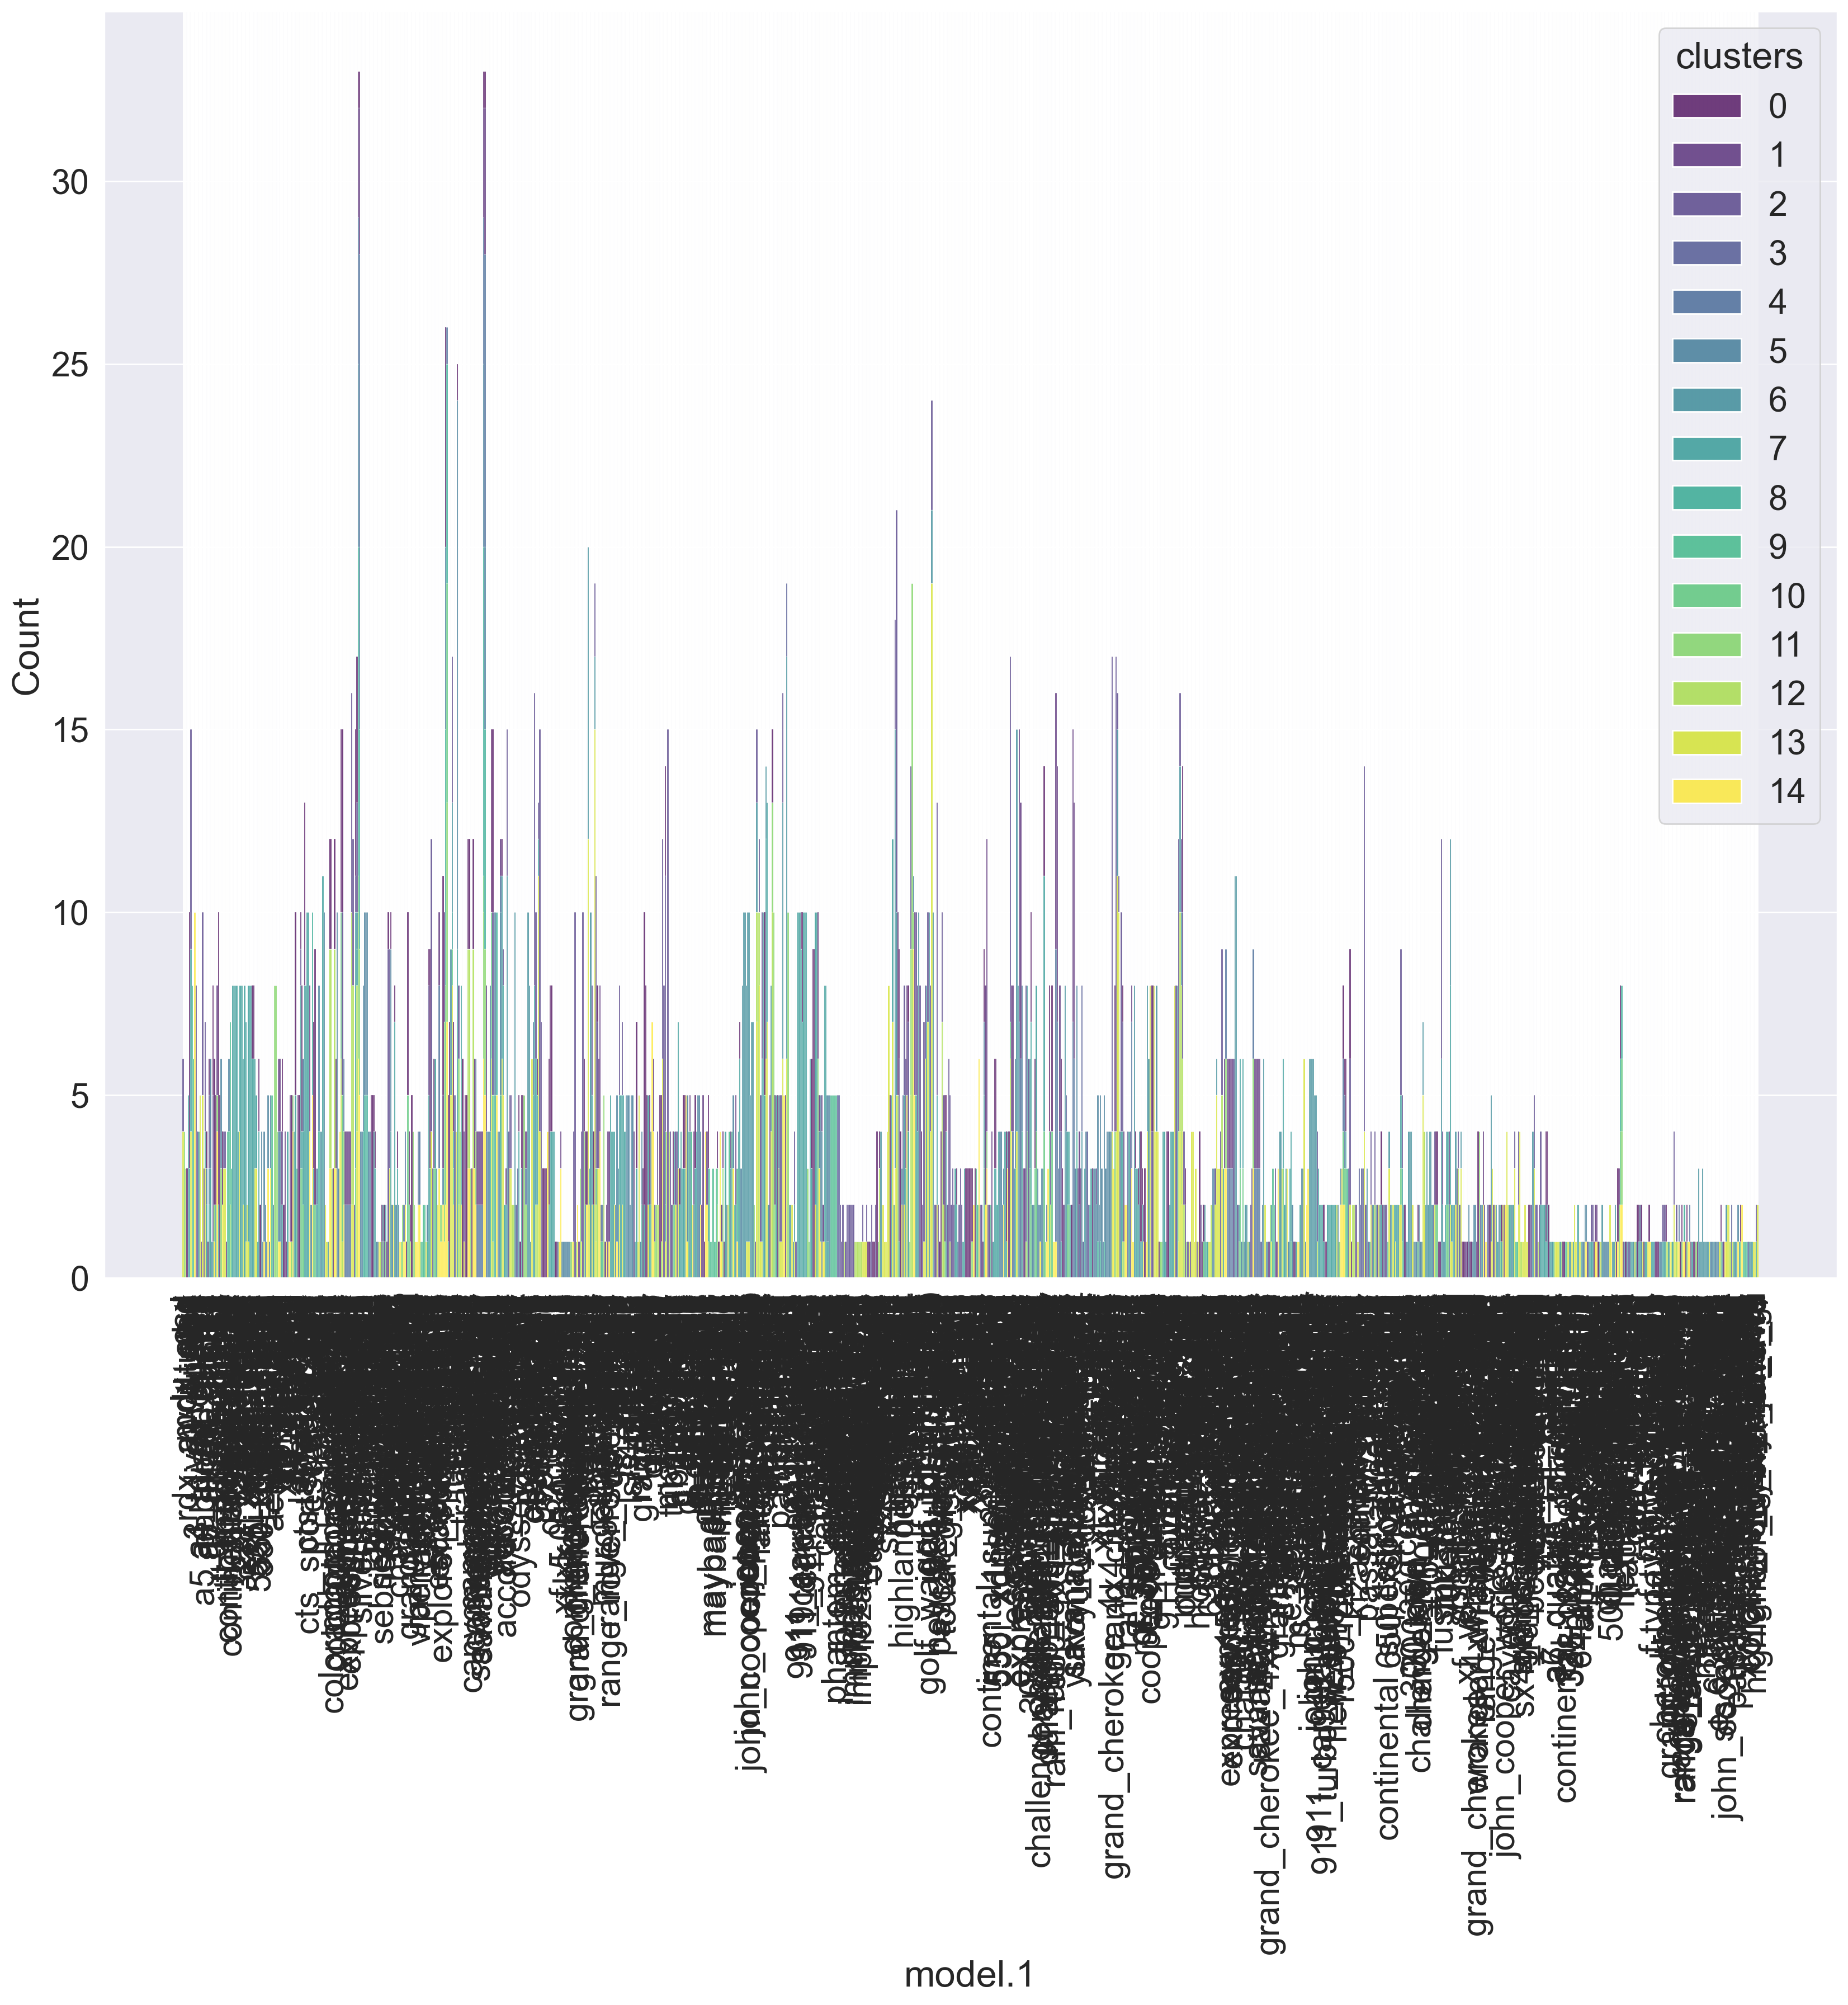

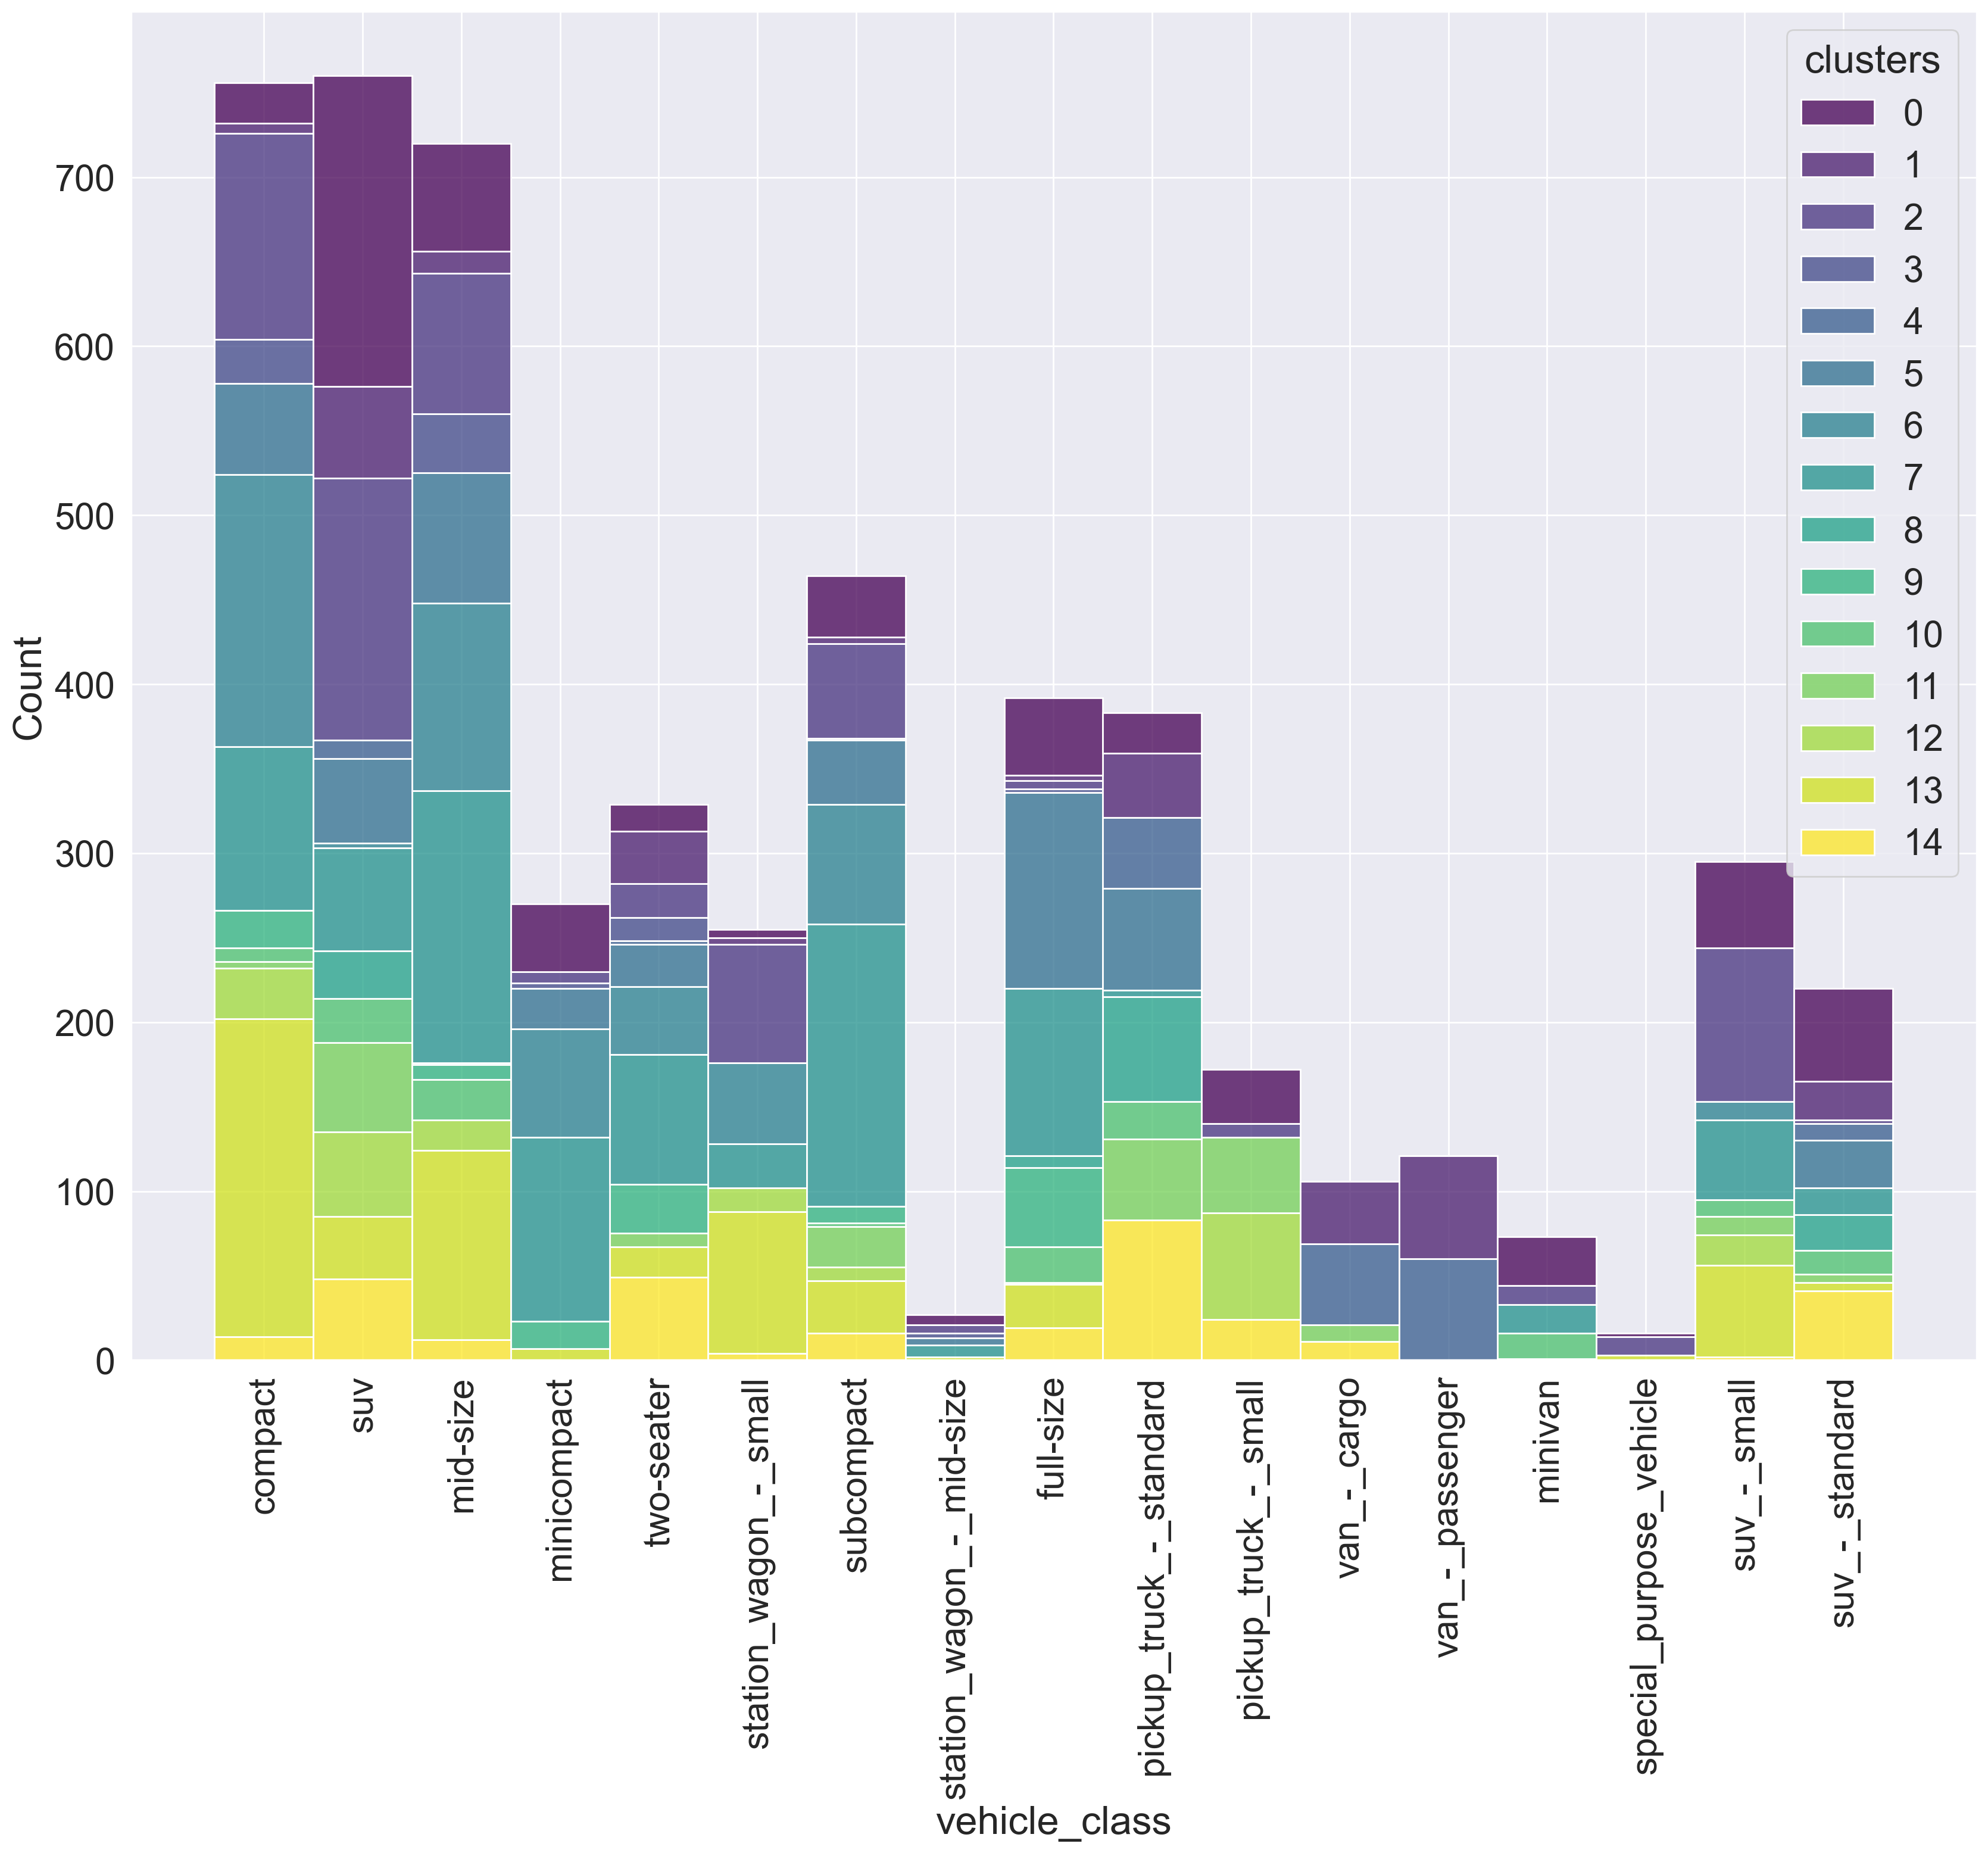

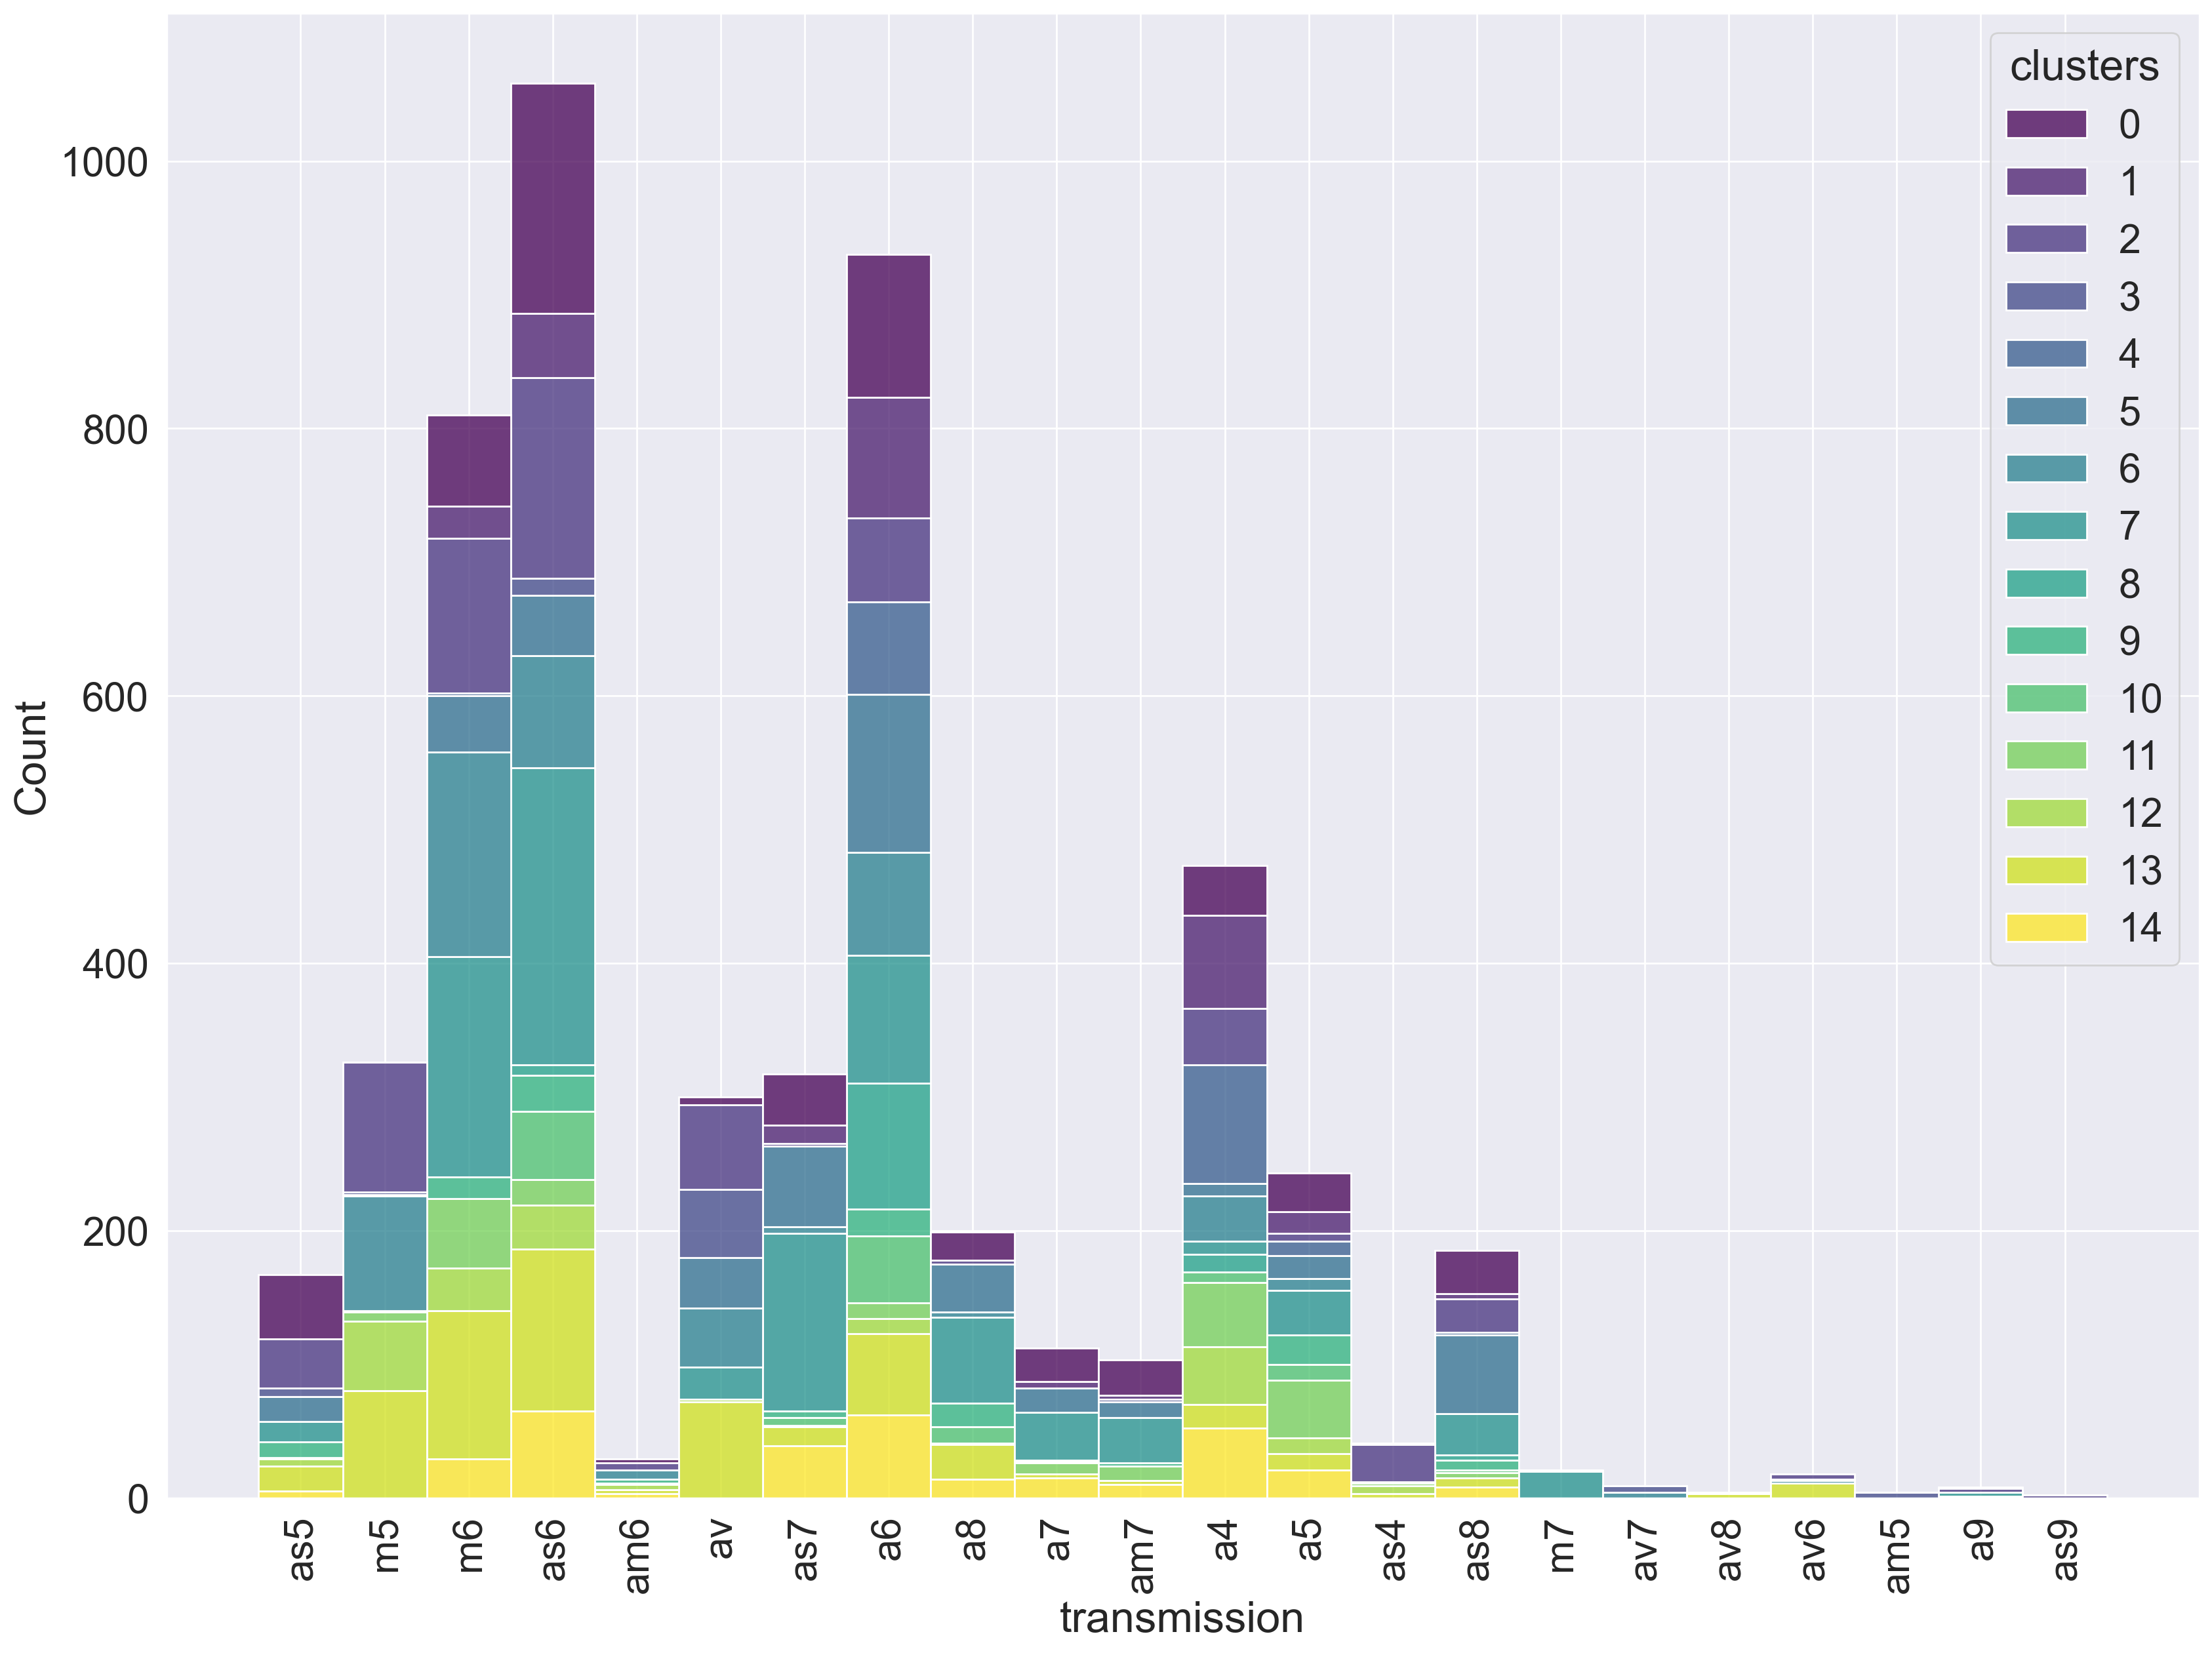

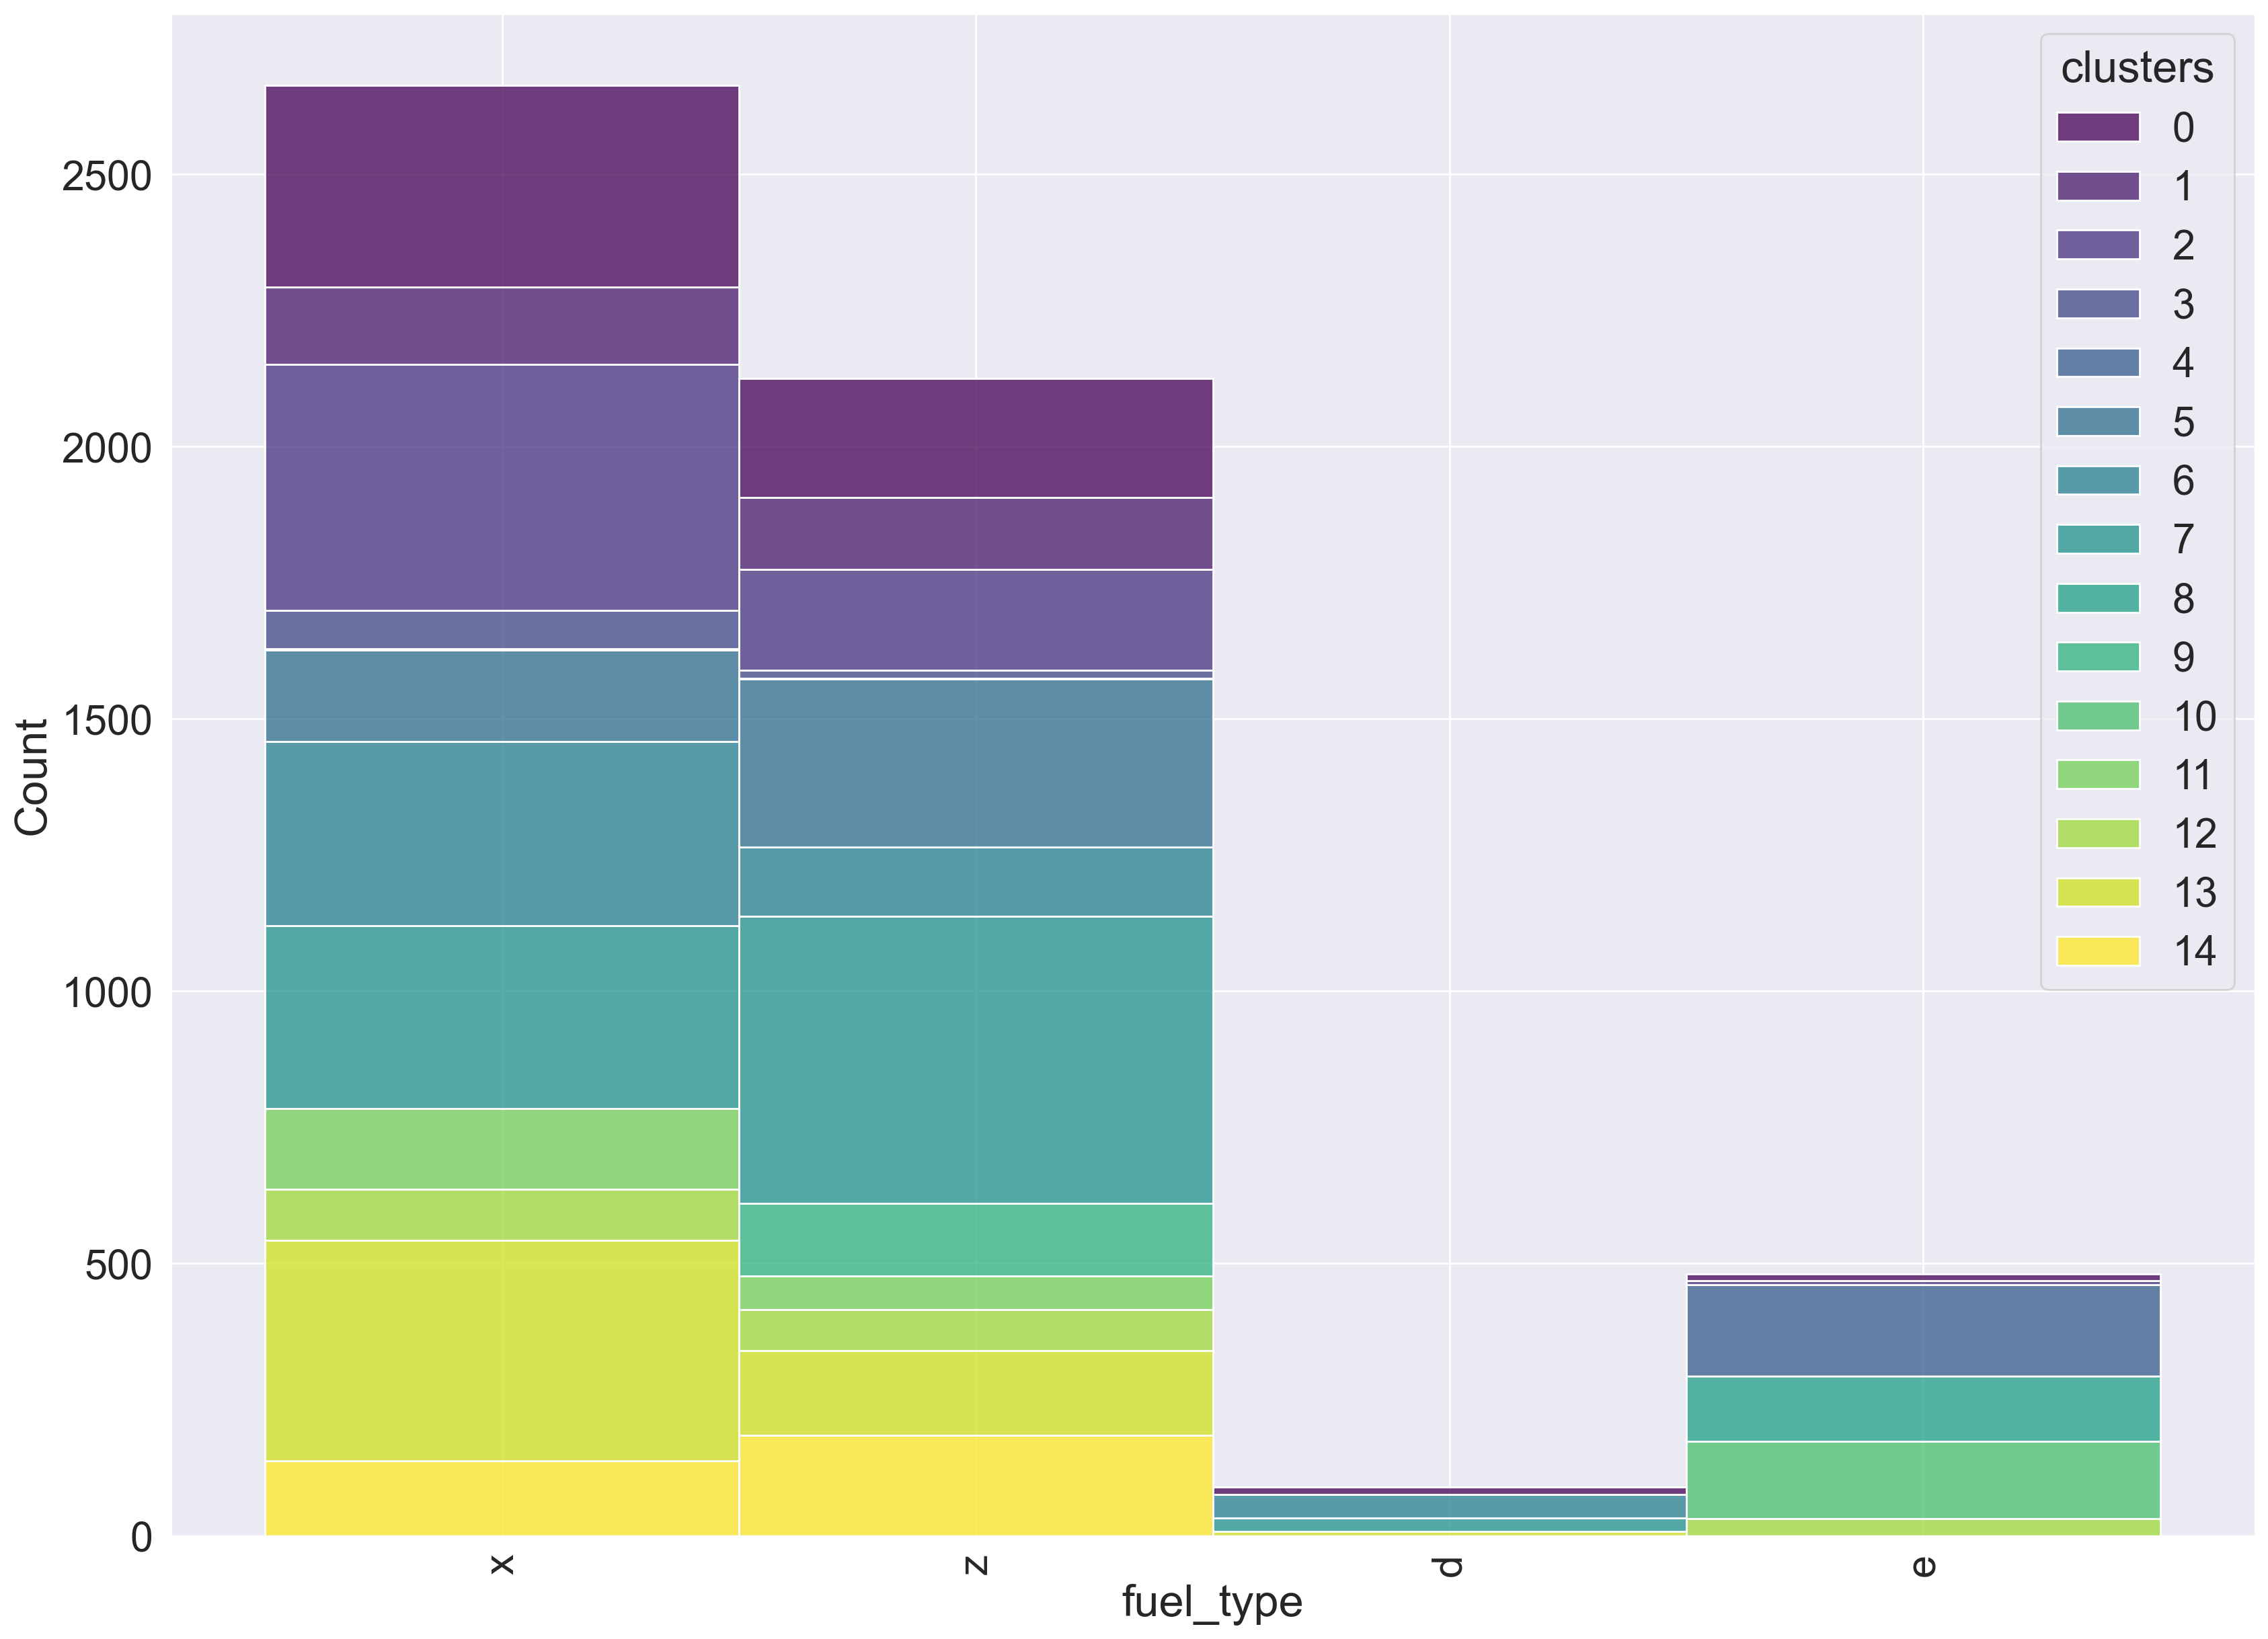

In [173]:
for col in df_ob.columns:
    sns.set(font_scale = 2)
    plt.figure(figsize = (20,15), dpi = 200)
    sns.histplot(data = clustered_s, x = col, hue = 'clusters', palette = 'viridis',  multiple="stack")
    plt.xticks(rotation=90)